In [1]:
import pandas as pd
import missingno as msno
from datetime import datetime
from datetime import date, timedelta
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize= (18, 10))
plt.style.use('fivethirtyeight')
import numpy as np
import random

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv', sep=',')
df_description = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv')

In [24]:
df_description.head(60)

,column,source,category,description
0,iso_code,International Organization for Standardization,Others,ISO 3166-1 alpha-3 – three-letter country codes
1,continent,Our World in Data,Others,Continent of the geographical location
2,location,Our World in Data,Others,Geographical location
3,date,Our World in Data,Others,Date of observation
4,total_cases,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Confirmed cases,"Total confirmed cases of COVID-19. Counts can include probable cases, where reported."
5,new_cases,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Confirmed cases,"New confirmed cases of COVID-19. Counts can include probable cases, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA."
6,new_cases_smoothed,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Confirmed cases,"New confirmed cases of COVID-19 (7-day smoothed). Counts can include probable cases, where reported."
7,total_deaths,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Confirmed deaths,"Total deaths attributed to COVID-19. Counts can include probable deaths, where reported."
8,new_deaths,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Confirmed deaths,"New deaths attributed to COVID-19. Counts can include probable deaths, where reported. In rare cases where our source reports a negative daily change due to a data correction, we set this metric to NA."
9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University,Confirmed deaths,"New deaths attributed to COVID-19 (7-day smoothed). Counts can include probable deaths, where reported."


In [3]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
# Удалим дубликаты с датафрейма
df =df.drop_duplicates()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204540 entries, 0 to 204539
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    204540 non-null  object 
 1   continent                                   192712 non-null  object 
 2   location                                    204540 non-null  object 
 3   date                                        204540 non-null  object 
 4   total_cases                                 196181 non-null  float64
 5   new_cases                                   195934 non-null  float64
 6   new_cases_smoothed                          194757 non-null  float64
 7   total_deaths                                177447 non-null  float64
 8   new_deaths                                  177423 non-null  float64
 9   new_deaths_smoothed                         176258 non-null  float64
 

Тип `date` является `object` преобраем тип в `datetime`

In [5]:
df['date'] = pd.to_datetime(df['date'])

### Выведем общие характеристики по датафрейму

In [6]:
print('Общее количество стран: \t', len(df['location'].unique()))
print('Начало наблюдений: \t', min(df.date).strftime('%Y-%m-%d'))
print('Конец наблюдений: \t', max(df.date).strftime('%Y-%m-%d'))
print('Количество строк датафрейма:\t', df.shape[0])
print('Число столбцов датафрейма:\t', df.shape[1])

Общее количество стран: 	 244
Начало наблюдений: 	 2020-01-01
Конец наблюдений: 	 2022-07-27
Количество строк датафрейма:	 204540
Число столбцов датафрейма:	 67


### Проверим пропущенные значения в данных

<AxesSubplot:>

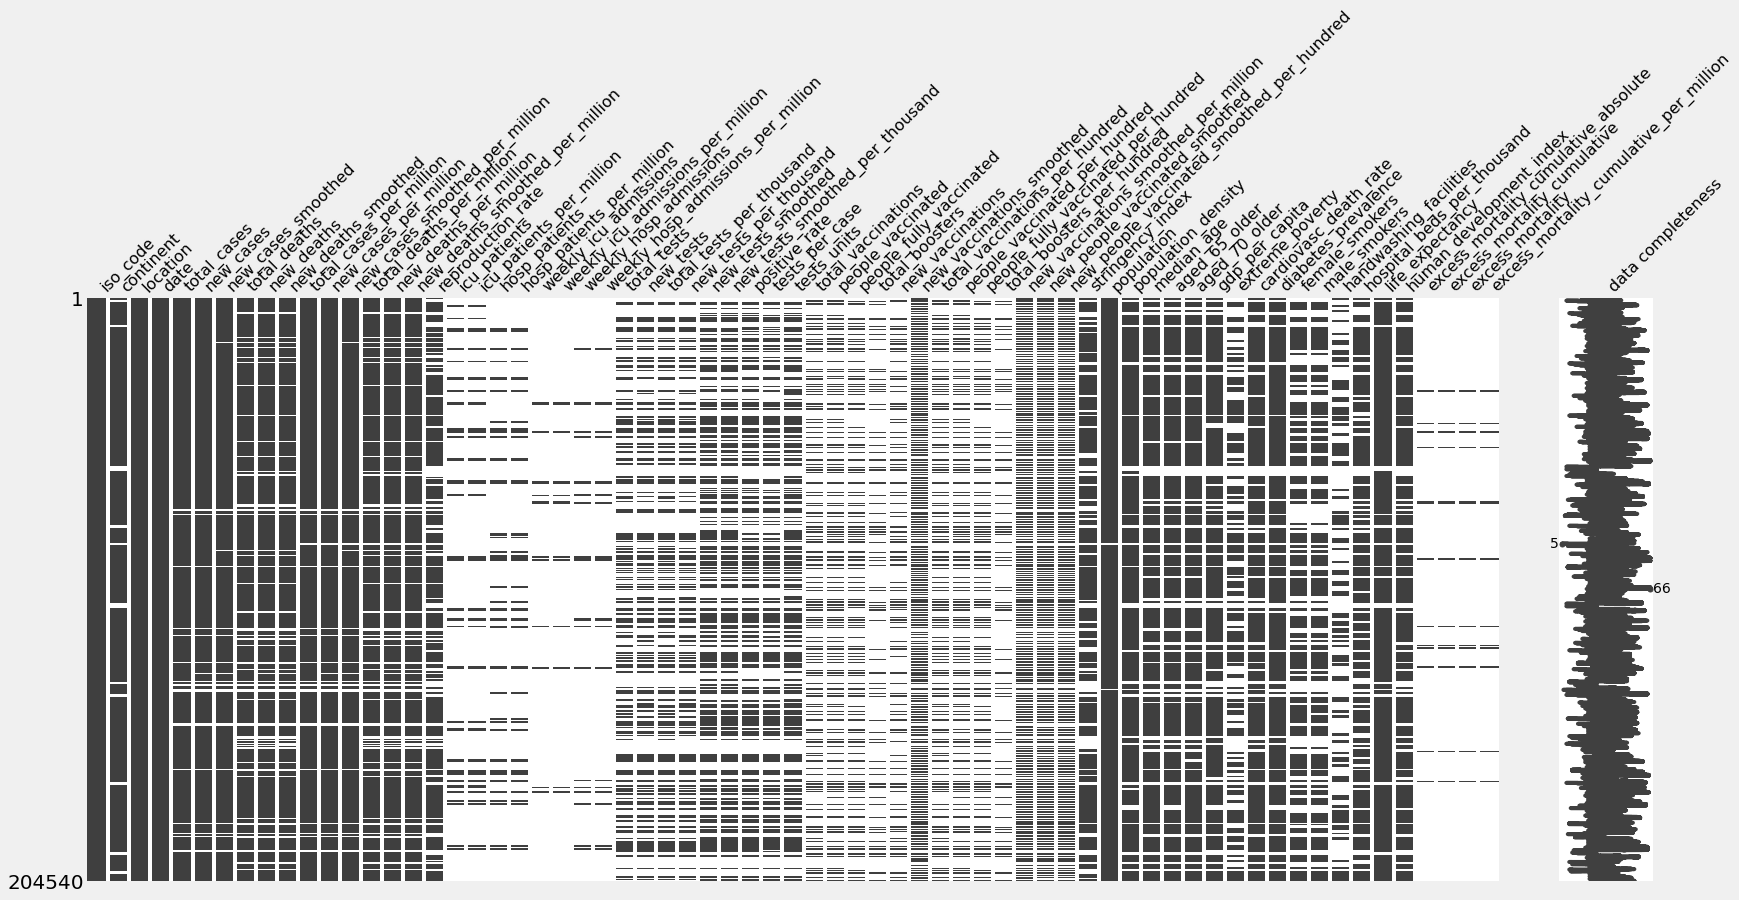

In [7]:
msno.matrix(df, labels=True)

По графику видно, что в данных пропущено много значений. Например, в столбцах, которые относятся к `Hospital & ICU` пропущенные значения могут говорить о том, что не все страны подают данные. Поэтому данные, относящиеся `Hospital & ICU` можно исключить из анализа. Также большое количество пропущенных значений в данных по `Vaccinations` это связано скорее всего из-за разницы во времени при появлении вакцин и появлении COVID. Пропущенные значения в тестах на COVID связаны, возможно с тем, что некоторые страны вообще не сообщали о прведенных тестах, а другие сообщали не ежедневно.

### Проверим отсутсвия в данных по прививкам `total_vaccinations`

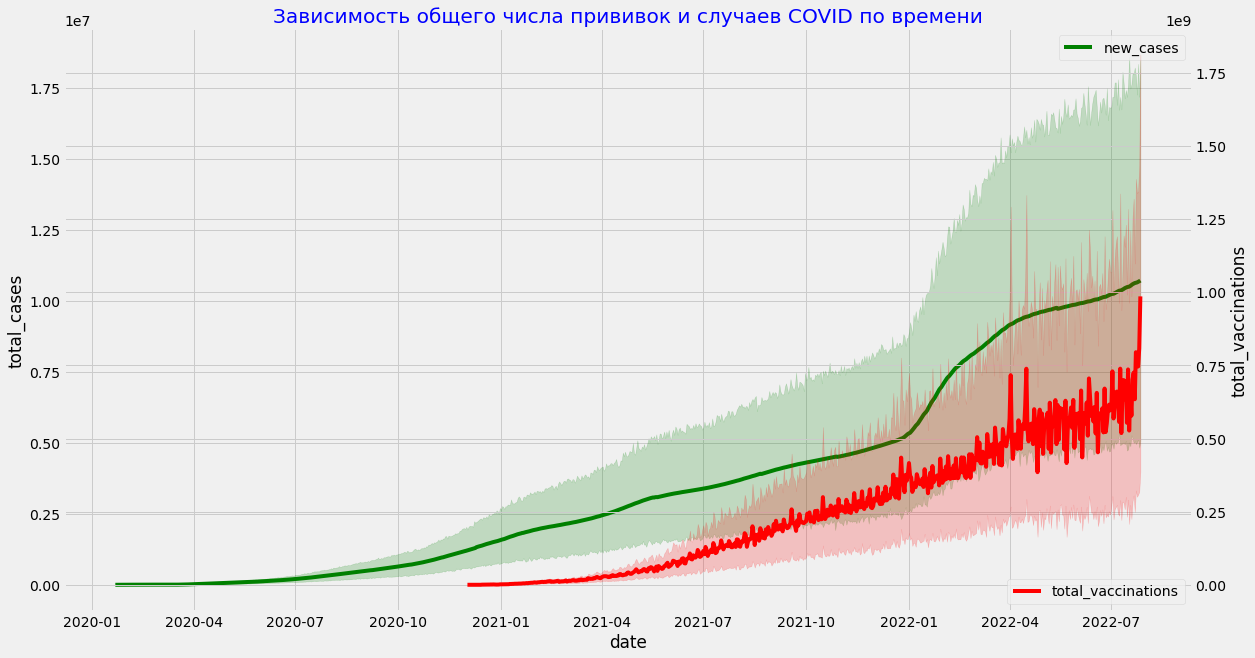

In [9]:
# Построим график total_cases и total_vaccinations
fig, ax1 = plt.subplots(figsize= (18, 10))
sns.lineplot(y='total_cases', x='date', data=df, color='green', label='new_cases')
ax2 = ax1.twinx()
sns.lineplot(y='total_vaccinations', x='date', data=df, color='red', label='total_vaccinations')
plt.title('Зависимость общего числа прививок и случаев COVID по времени', color = 'blue')
plt.legend(loc=4)

Из графика видно, что прививки появились позже, а именно в конце 20 года, поэтому по ним столько пропущенных значений

### Посмотрим какие страны пропущены по населению

In [10]:
df[df.population.isna()].location.unique()

array(['International', 'Northern Cyprus'], dtype=object)

### Посмотрим на пропущенные значения в столбце `continent` по `location`

In [11]:
strange_location = df[df['continent'].isna()]['location'].unique().tolist()
strange_location

['Africa',
 'Asia',
 'Europe',
 'European Union',
 'High income',
 'International',
 'Low income',
 'Lower middle income',
 'North America',
 'Oceania',
 'South America',
 'Upper middle income',
 'World']

Выведем размеры населения по списку `strange_location`

In [12]:
temp_df_popul = df[df['location'].isin(strange_location)].groupby('location')['population'].mean()
temp_df_popul

location
Africa                 1.392394e+09
Asia                   4.693235e+09
Europe                 7.486552e+08
European Union         4.475935e+08
High income            1.241374e+09
International                   NaN
Low income             7.019270e+08
Lower middle income    3.363197e+09
North America          5.963153e+08
Oceania                4.449177e+07
South America          4.339567e+08
Upper middle income    2.501428e+09
World                  7.909295e+09
Name: population, dtype: float64

In [13]:
df[df.population.isna()].location.unique()

array(['International', 'Northern Cyprus'], dtype=object)

In [14]:
df[df['location'] == 'World']['population'].unique()[0]

7909295152.0

Отсюда видно, что в локации находятся не только географические положения, но и данные по доходу, а в локации `international` почти все значения пропущены.

#### Создадим два списка по географическому положению и по доходу

In [15]:
geo_location = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
income_location = ['High income', 'Low income', 'Lower middle income', 'Upper middle income']

#### Напишем функцию для создания разных цветов

In [18]:
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))

### Создадим датафрейм для построения графиков (ГЕОЛОКАЦИЯ)

In [19]:
# Создаем датафейм по гелокации
temp_geo_df = (df[df['location'].isin(geo_location)].groupby('location', as_index=False)
.agg({'population': np.mean,
     'new_cases' :np.sum,
     'new_deaths' : np.sum,
     'people_fully_vaccinated' : 'max'}).copy())
# создадим переменную world_popultion
world_population = df[df['location'] == 'World']['population'].unique()[0]
# Создадим столбец с процентом от общего населения
temp_geo_df['percentage_population'] = np.round(100 * temp_geo_df['population'] / world_population)
# создадим переменную количества случаев ковид во всем мире
world_cases = (df[df['location'].isin(geo_location)]
               .groupby('location', as_index=False)
               .agg({'new_cases': np.sum})['new_cases'].sum())
# Создадим столбец по общему количеству случаев в процентах
temp_geo_df['covid_case_percentage'] = np.round(100 * temp_geo_df['new_cases'] / world_cases)
temp_geo_df
# создадим столбец процент инфицированных по населению
temp_geo_df['covid_infeceted_percentage'] = np.round(100 * temp_geo_df['new_cases'] / temp_geo_df['population'])
# Создаем процент по смертности населения
temp_geo_df['vaccin_of_population_percentage'] =  (np.round(100 * temp_geo_df['people_fully_vaccinated']
                                                            / 
                                                            temp_geo_df['population']))
temp_geo_df['deaths_percentage_popultion'] =  round((100 * temp_geo_df['new_deaths']
                                                            / 
                                                            temp_geo_df['population']), 2)
temp_geo_df

,location,population,new_cases,new_deaths,people_fully_vaccinated,percentage_population,covid_case_percentage,covid_infeceted_percentage,vaccin_of_population_percentage,deaths_percentage_popultion
0,Africa,1.392394e+09,12229355.0,255765.0,2.884680e+08,18.0,2.0,1.0,21.0,0.02
1,Asia,4.693235e+09,163024349.0,1443241.0,3.343867e+09,59.0,28.0,3.0,71.0,0.03
2,Europe,7.486552e+08,216521900.0,1877257.0,4.938826e+08,9.0,38.0,29.0,66.0,0.25
3,North America,5.963153e+08,107934260.0,1469109.0,3.822928e+08,8.0,19.0,18.0,64.0,0.25
4,Oceania,4.449177e+07,11218090.0,15839.0,2.784390e+07,1.0,2.0,25.0,63.0,0.04
5,South America,4.339567e+08,61765508.0,1289885.0,3.310612e+08,5.0,11.0,14.0,76.0,0.30


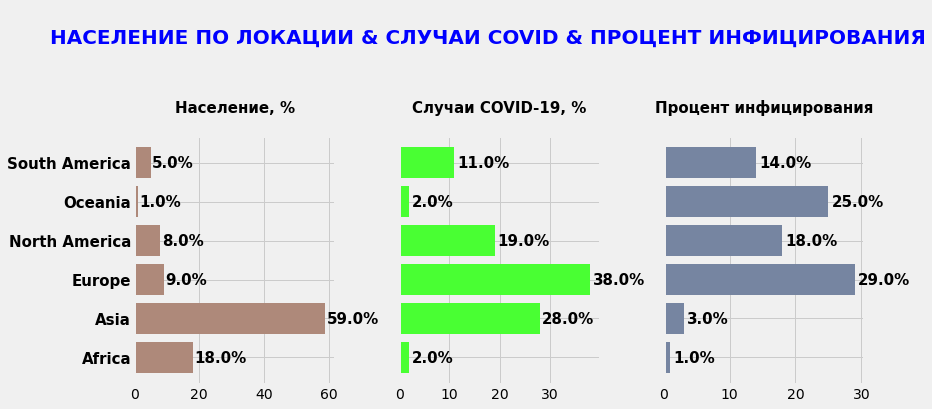

In [20]:
fig = plt.figure(figsize=(16, 6))

# Создаем цвета
colors = get_colors(3)
# Переменные
gr_col = ['percentage_population','covid_case_percentage', 'covid_infeceted_percentage']
# Названия графиков
gr_name = ['Население, %', 'Случаи COVID-19, %', 'Процент инфицирования']

for i, name in enumerate(gr_col):
    ax = fig.add_subplot(1, 4, i+1)
    ax.barh(temp_geo_df['location'], temp_geo_df[name], color=colors[i])
# Устанавливаем названия
    ax.set_title(' '.join(gr_name[i].split('_'))+'\n', fontsize=15, color='black', weight='bold')
    plt.yticks(fontsize=15, weight='bold')
    
# Выводим значения
    for idx, value in temp_geo_df[gr_col[i]].iteritems():
        ax.text(value+0.5, idx, str(value)+'%', va='center', fontsize=15, weight='bold')
    if i>0:
        ax.tick_params(labelleft = False)
plt.suptitle('\nНАСЕЛЕНИЕ ПО ЛОКАЦИИ & СЛУЧАИ COVID & ПРОЦЕНТ ИНФИЦИРОВАНИЯ', fontsize=20, y=1, x=0.43, color='blue', weight='bold')    
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.rcParams['font.family'] = "Courier New, monospace"
plt.show()

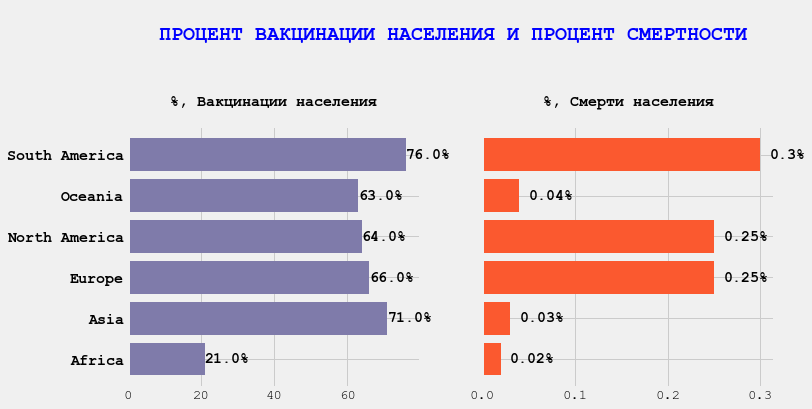

In [21]:
fig = plt.figure(figsize=(16, 6))

# Создаем цвета
# Функция для создания цветов

colors = get_colors(2)
# Переменные
gr_col = ['vaccin_of_population_percentage','deaths_percentage_popultion']
# Названия графиков
gr_name = ['%, Вакцинации населения', '%, Смерти населения']

for i, name in enumerate(gr_col):
    ax = fig.add_subplot(1, 3, i+1)
    ax.barh(temp_geo_df['location'], temp_geo_df[name], color=colors[i])
# Устанавливаем названия
    ax.set_title(' '.join(gr_name[i].split('_'))+'\n', fontsize=15, color='black', weight='bold')
    plt.yticks(fontsize=15, weight='bold')
    
# Выводим значения
    for idx, value in temp_geo_df[gr_col[i]].iteritems():
        ax.text(value+0.01, idx, str(value)+'%', va='center', fontsize=15, weight='bold')
    if i>0:
        ax.tick_params(labelleft = False)
plt.suptitle('\nПРОЦЕНТ ВАКЦИНАЦИИ НАСЕЛЕНИЯ И ПРОЦЕНТ СМЕРТНОСТИ', fontsize=20, y=1, x=0.4, color='blue', weight='bold')    
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.rcParams['font.family'] = "Courier New, monospace"
plt.show()

### Создаем данные по доходу

In [24]:
# Создаем датафейм по доходу
temp_income_df = (df[df['location'].isin(income_location)].groupby('location', as_index=False)
.agg({'population': np.mean,
     'new_cases' :np.sum,
     'new_deaths' : np.sum,
     'people_fully_vaccinated' : 'max'}).copy())
# создадим переменную world_popultion
income_population = np.sum(temp_income_df['population'])
# Создадим столбец с процентом от общего населения
temp_income_df['percentage_population'] = np.round(100 * temp_geo_df['population'] / income_population)
# создадим переменную количества случаев ковид во всем мире
world_income_cases = (df[df['location'].isin(income_location)]
               .groupby('location', as_index=False)
               .agg({'new_cases': np.sum})['new_cases'].sum())
# Создадим столбец по общему количеству случаев в процентах
temp_income_df['covid_case_percentage'] = np.round((100 * temp_income_df['new_cases'] / world_income_cases), 2)
temp_income_df
# создадим столбец процент инфицированных по населению
temp_income_df['covid_infeceted_percentage'] = np.round((100 * temp_income_df['new_cases'] / temp_income_df['population']), 2)
# Создаем процент по смертности населения
temp_income_df['vaccin_of_population_percentage'] =  (np.round(100 * temp_income_df['people_fully_vaccinated']
                                                            / 
                                                            temp_income_df['population']))
temp_income_df['deaths_percentage_popultion'] =  round((100 * temp_income_df['new_deaths']
                                                            / 
                                                            temp_income_df['population']), 2)
temp_income_df


,location,population,new_cases,new_deaths,people_fully_vaccinated,percentage_population,covid_case_percentage,covid_infeceted_percentage,vaccin_of_population_percentage,deaths_percentage_popultion
0,High income,1.241374e+09,342981952.0,2470359.0,9.127694e+08,18.0,59.89,27.63,74.0,0.20
1,Low income,7.019270e+08,1879201.0,43447.0,1.130878e+08,60.0,0.33,0.27,16.0,0.01
2,Lower middle income,3.363197e+09,92798093.0,1311243.0,1.867807e+09,10.0,16.20,2.76,56.0,0.04
3,Upper middle income,2.501428e+09,135007293.0,2525979.0,1.973718e+09,8.0,23.58,5.40,79.0,0.10


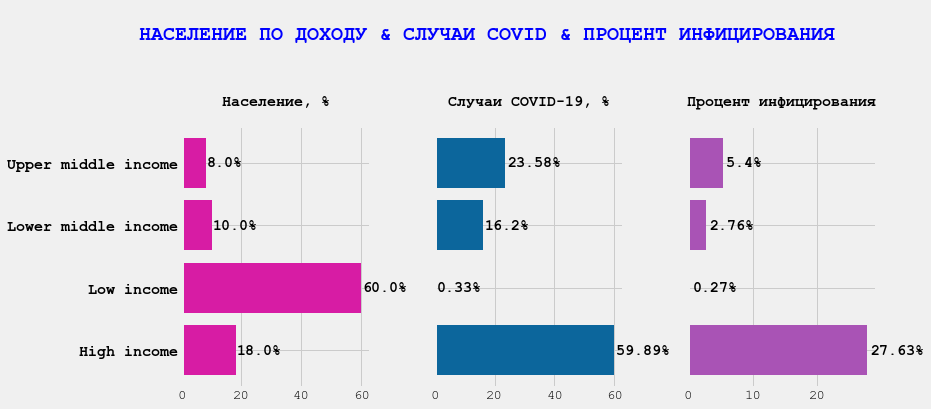

In [23]:
# Делаем графики по доходу
fig = plt.figure(figsize=(16, 6))

# Создаем цвета
colors = get_colors(3)
# Переменные
gr_col = ['percentage_population','covid_case_percentage', 'covid_infeceted_percentage']
# Названия графиков
gr_name = ['Население, %', 'Случаи COVID-19, %', 'Процент инфицирования']

for i, name in enumerate(gr_col):
    ax = fig.add_subplot(1, 4, i+1)
    ax.barh(temp_income_df['location'], temp_income_df[name], color=colors[i])
# Устанавливаем названия
    ax.set_title(' '.join(gr_name[i].split('_'))+'\n', fontsize=15, color='black', weight='bold')
    plt.yticks(fontsize=15, weight='bold')
    
# Выводим значения
    for idx, value in temp_income_df[gr_col[i]].iteritems():
        ax.text(value+0.5, idx, str(value)+'%', va='center', fontsize=15, weight='bold')
    if i>0:
        ax.tick_params(labelleft = False)
plt.suptitle('\nНАСЕЛЕНИЕ ПО ДОХОДУ & СЛУЧАИ COVID & ПРОЦЕНТ ИНФИЦИРОВАНИЯ', fontsize=20, y=1, x=0.43, color='blue', weight='bold')    
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.rcParams['font.family'] = "Courier New, monospace"
plt.show()

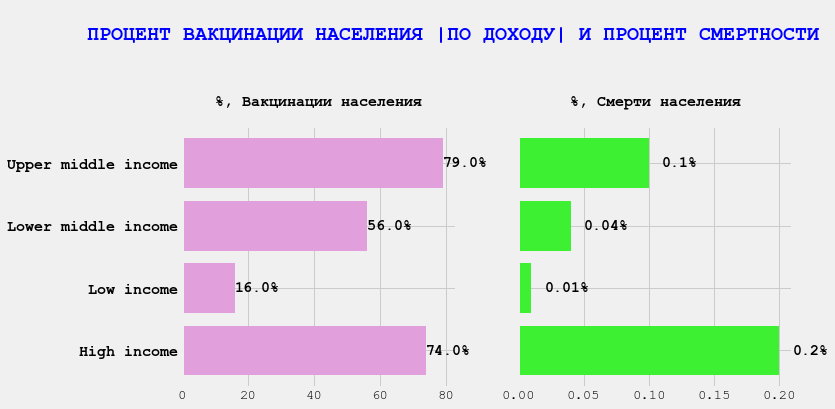

In [25]:
fig = plt.figure(figsize=(16, 6))

# Создаем цвета
colors = get_colors(2)
# Переменные
gr_col = ['vaccin_of_population_percentage','deaths_percentage_popultion']
# Названия графиков
gr_name = ['%, Вакцинации населения', '%, Смерти населения']

for i, name in enumerate(gr_col):
    ax = fig.add_subplot(1, 3, i+1)
    ax.barh(temp_income_df['location'], temp_income_df[name], color=colors[i])
# Устанавливаем названия
    ax.set_title(' '.join(gr_name[i].split('_'))+'\n', fontsize=15, color='black', weight='bold')
    plt.yticks(fontsize=15, weight='bold')
    
# Выводим значения
    for idx, value in temp_income_df[gr_col[i]].iteritems():
        ax.text(value+0.01, idx, str(value)+'%', va='center', fontsize=15, weight='bold')
    if i>0:
        ax.tick_params(labelleft = False)
plt.suptitle('\nПРОЦЕНТ ВАКЦИНАЦИИ НАСЕЛЕНИЯ |ПО ДОХОДУ| И ПРОЦЕНТ СМЕРТНОСТИ', fontsize=20, y=1, x=0.4, color='blue', weight='bold')    
fig.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.rcParams['font.family'] = "Courier New, monospace"
plt.show()

# Остановились тут

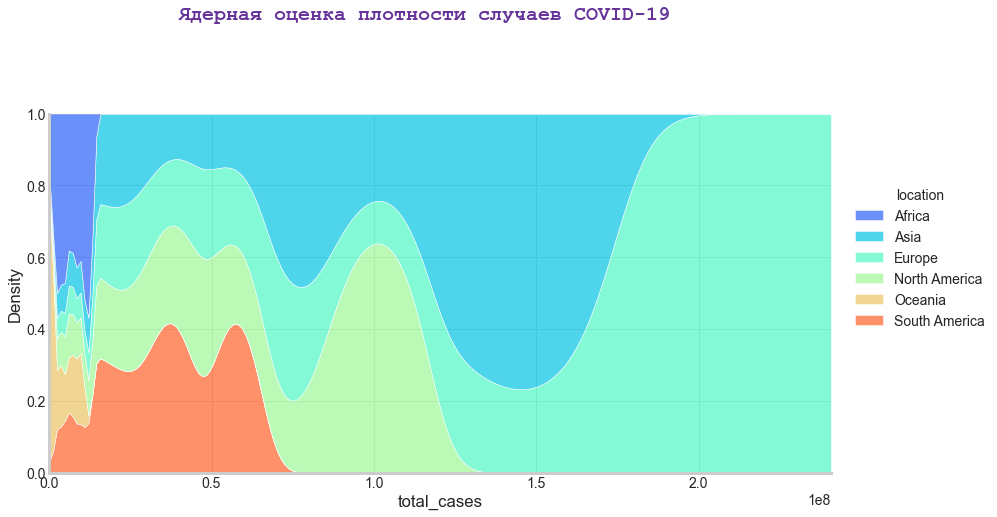

In [29]:
sns.set_style("whitegrid")
ax = sns.displot(data=df[df['location'].isin(geo_location)][['location', 'total_cases']]
                 ,x="total_cases", hue="location",kind="kde", height=6, aspect=2,
            multiple="fill", clip=(0, None), palette="rainbow");

plt.rcParams['font.family'] = "Courier New, monospace"
plt.rcParams['font.serif'] = ["Courier New, monospace"]
plt.suptitle('Ядерная оценка плотности случаев COVID-19'
             , fontsize=20, y=1.2, x=0.43, color='RebeccaPurple', weight='bold');

In [30]:
# Создаем данные для анализа. Оставляем только те данные где значения континент не пропущены
df2 = df[df['continent'].notna()].copy()
df2.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


### Удалим некоторые пропущенные данные
#### Данные по госпитализации практически отсутствуют из следующих столбцов:
* `'icu_patients'`
* `'icu_patients_per_million'`
* `'hosp_patients'`
* `'hosp_patients_per_million'`
* `'weekly_icu_admissions'`
* `'weekly_icu_admissions_per_million'`
* `'weekly_hosp_admissions'`
* `'weekly_hosp_admissions_per_million'`
#### Также пропущены почти все значения из столбцов:

* `'handwashing_facilities'`
* `'excess_mortality_cumulative_absolute'`
* `'excess_mortality_cumulative'`
* `'excess_mortality'`
* `'excess_mortality_cumulative_per_million'`
#### Уберем их из дальнейшего анализа

#### Также уберем некоторые колонки, которые можно посчитать самостоятельно

In [31]:
df2 = df2.drop(columns = ['new_deaths_smoothed','total_deaths_per_million', 'new_deaths_per_million',
      'icu_patients', 'icu_patients_per_million', 'hosp_patients','new_deaths_smoothed_per_million',
       'hosp_patients_per_million', 'weekly_icu_admissions', 'new_cases_smoothed', 'new_cases_smoothed_per_million',
       'weekly_icu_admissions_per_million', 'handwashing_facilities',
        'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
       'excess_mortality', 'excess_mortality_cumulative_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_boosters', 'people_fully_vaccinated_per_hundred', 
       'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed', 'total_tests_per_thousand',
       'new_tests_per_thousand', 'new_tests_smoothed',
       'new_tests_smoothed_per_thousand', 'tests_per_case', 'tests_units', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'people_vaccinated_per_hundred', 'extreme_poverty', 
                          'female_smokers', 'male_smokers']).copy()

### Посмотрим на пропуски в данных

<AxesSubplot:>

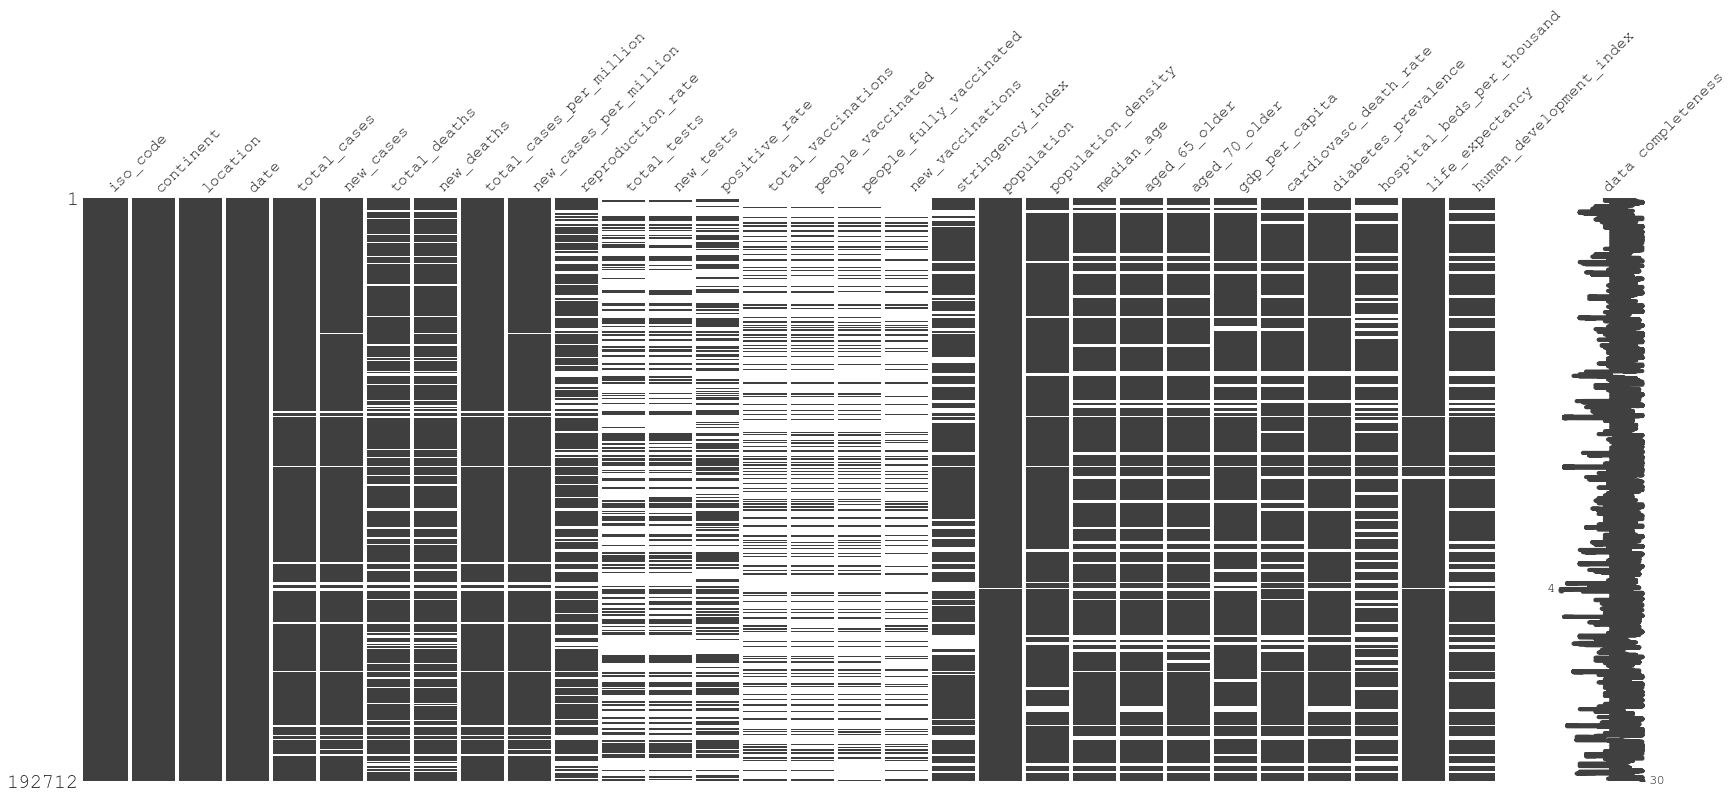

In [32]:
msno.matrix(df2, labels=True)

### Чистка и замена пропущенных данных

Заменим пропущенные значения, через группировку по географическому положению. Таким образом, что если начальное значение пропущенно, оно заменяется на ноль, а последующие пропущенные значения меняются на предыдущие значение.

#### Изменим следующие колонки:
 `total_deaths`, `total_tests`,`total_cases` `tests_units`, `total_vaccinations`, `people_vaccinated`, `people_fully_vaccinated`

In [33]:
df3 = df2.copy()
df3[['total_deaths',
     'total_cases',
     'total_tests',
     'total_vaccinations',
     'people_vaccinated',
     'people_fully_vaccinated',
     'reproduction_rate',
     'positive_rate',
     'stringency_index']] = (df2.groupby(['location'],sort=False)[['total_deaths',
                                                                   'total_cases',
                                                                   'total_tests',
                                                                   'total_vaccinations',
                                                                   'people_vaccinated',
                                                                   'people_fully_vaccinated',
                                                                   'reproduction_rate',
                                                                   'positive_rate',
                                                                   'stringency_index']]
                                                                                 .apply(lambda x: x.ffill().fillna(0)))

### При замене значений мы должны учесть что общее количество случаев зависит от новых случаев, а максимум общего количества случаев равен сумме новых случаев.

##### Напишем для этого функцию

##### total_event [i + 1] = total_event [i] + new_event [i+1]

In [34]:
def total_new_feature(df,new,total):
    # Получаем индексы если разница соседних значений столбца отрицаьтельна
    x=df[df.groupby('location')[total].diff()<0].index  
    while len(x)>0:
        for i in x:
            df.loc[i,total]=df.loc[i-1,total] # Меняем значение на новое
        x=df[df.groupby('location')[total].diff()<0].index
    df[new]=df.groupby('location')[total].diff()
    df.loc[df.groupby('location')[new].head(1).index, new] = df.loc[df.groupby('location')[new].head(1).index, total]
    return df

### Обновляем значения в следующих столбцах:

* `new_deaths'` и `'total_deaths'`
* `'new_tests'` и  `'total_tests'`
* `new_vaccinations` и `total_vaccinations`

In [35]:

df4 = df3.copy()
# Меняем данные в столбце total_cases и new_cases
df4 = total_new_feature(df4,'new_cases','total_cases')

# Меняем данные в столбце total_deaths и new_deaths
df4 = total_new_feature(df4,'new_deaths','total_deaths')

# Меняем данные в столбце total_tests и new_tests
df4 = total_new_feature(df4,'new_tests','total_tests')

# Меняем данные в столбце total_vaccinations и new_vaccinations
df4 = total_new_feature(df4,'new_vaccinations','total_vaccinations')





<AxesSubplot:>

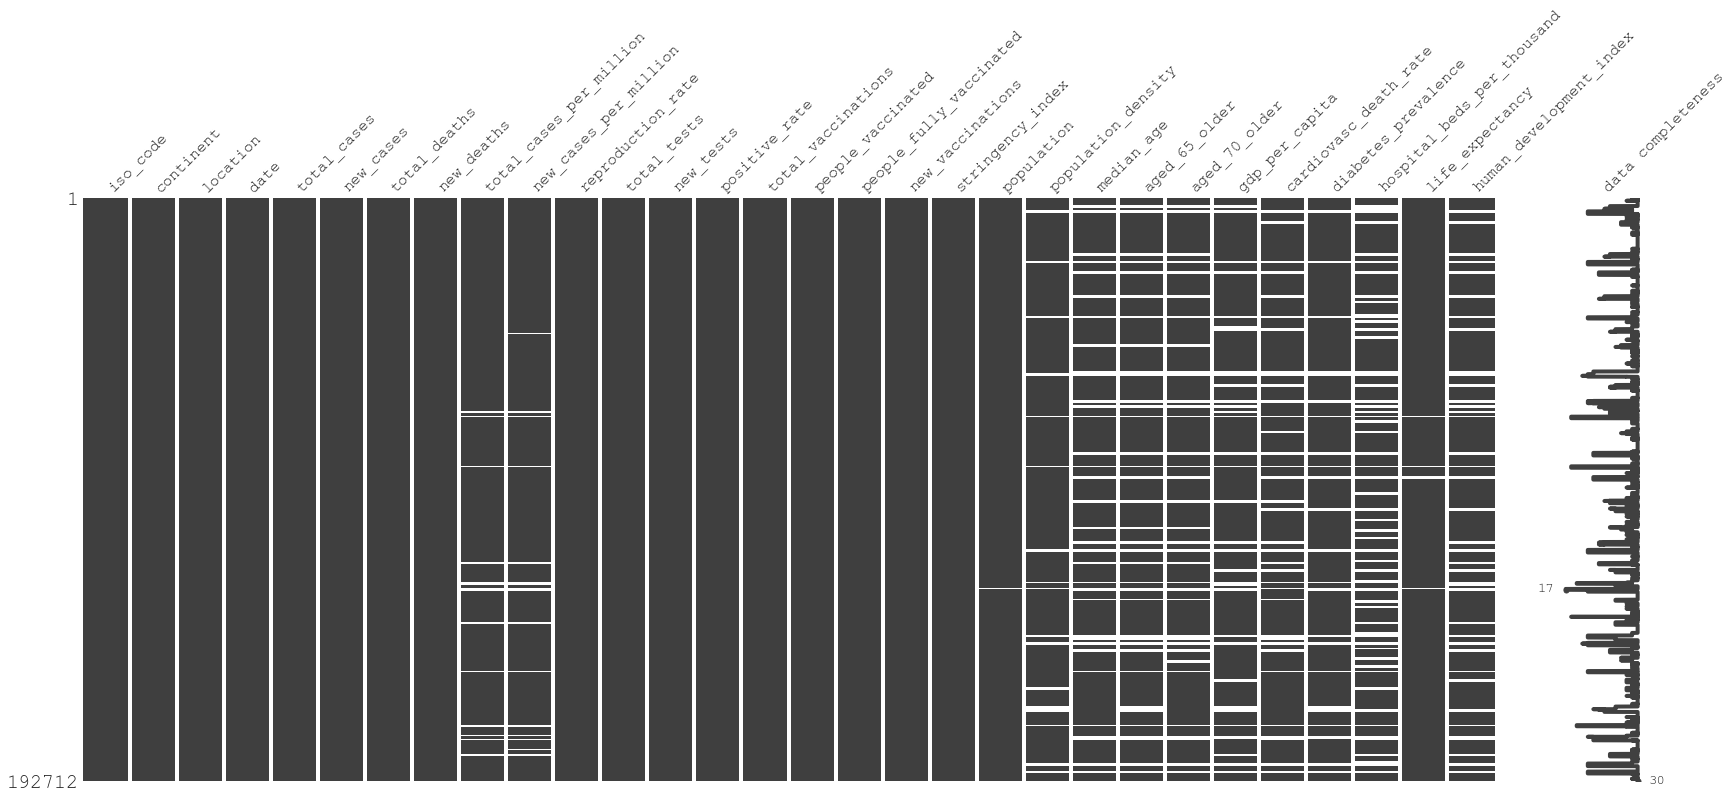

In [36]:
msno.matrix(df4, labels=True)

In [37]:
# Уберем из анализа Северный Кипр, у него не указано население
df5 = df4[df4['population'].notna()].copy()
# Изменим значения в колонках
df5['total_cases_per_million'] = (df5['total_cases'] / df5['population']) * 10 ** 6
df5['new_cases_per_million'] = (df5['new_cases'] / df5['population']) * 10 ** 6

In [38]:
df5.head(5)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,total_tests,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.12469,0.12469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


### Для анализа возьмем страны с населением более 500 тысяч человек

In [39]:
df6 = df5[df5['population'] > 500000].copy()
df6.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,total_tests,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.12469,0.12469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,0.5,64.83,0.511


### Напишем функцию для замены пропущенных значений по признаку


In [40]:
# Функция меняет пустые значения в столбце на необходимые нам
def fillna_features(df,location,feature,value):
    ind=df[df['location']==location].index
    df.loc[ind[0]:ind[-1],feature].fillna(value=value,inplace=True)

In [303]:
# Посмотрим пропуски по плотности населения
(df6[df6['population_density'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))


,location,population


### Меняем плотность населения в странах: `Syria`, `Taiwan`, `South Sudan`, `Western Sahara`

In [304]:
# Данные по плотности взяты с сайта
fillna_features(df6,'Taiwan','population_density',660)
fillna_features(df6,'Syria','population_density',119)
fillna_features(df6,'South Sudan','population_density',18)
fillna_features(df6,'Western Sahara','population_density',2)

### Посмотрим пропуски по `median age`

In [305]:
# Посмотрим пропуски по плотности населения
(df6[df6['median_age'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population


### Меняем пропущенные значения среднего возраста в  `Kosovo`

In [306]:
# Данные по среднему возрасту взяты countrymeters.info
fillna_features(df6,'Kosovo','median_age',30.5)

### Смотрим пропущенные значения по категории возраста старше 65 лет

In [307]:
(df6[df6['aged_65_older'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population


### Меняем пустые значения `aged_65_older в странах`: `Syria`, `Taiwan`, `Kosovo`, `Western Sahara`

In [308]:
# Данные по плотности взяты с сайта countrymeters.info
fillna_features(df6,'Taiwan','aged_65_older',12)
fillna_features(df6,'Syria','aged_65_older',3.8)
fillna_features(df6,'Kosovo','aged_65_older',6.8)
fillna_features(df6,'Western Sahara','aged_65_older',3.6)

Исключим из анализа долю людей старше 70 лет. Так как в эту группу входит возраст более 65 лет

In [309]:
df7 = df6.drop(columns = ['aged_70_older']).copy()
df7.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,total_tests,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.12469,0.12469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511


<AxesSubplot:>

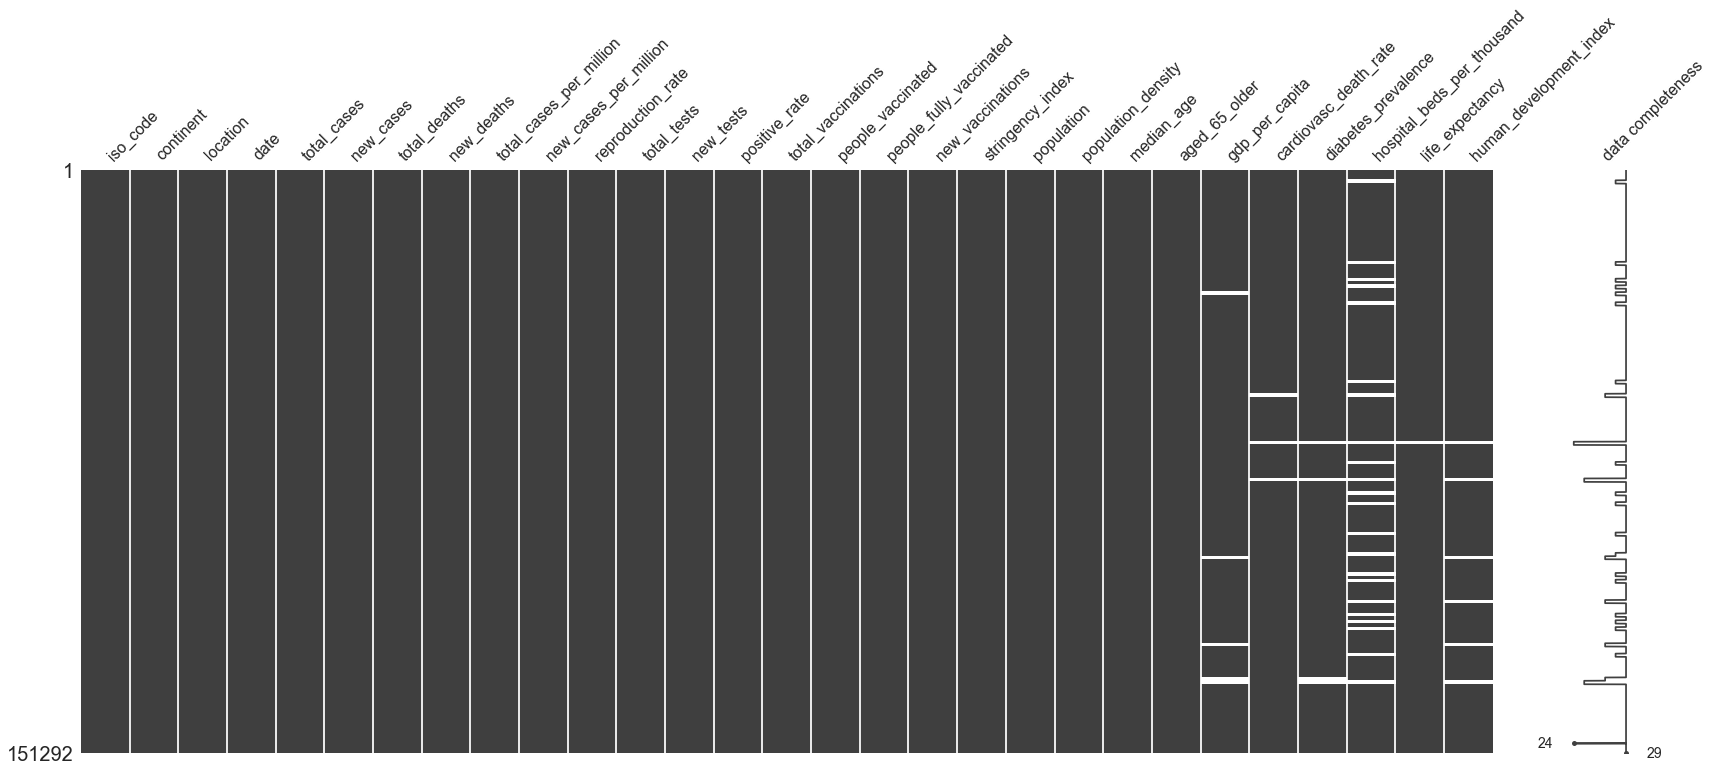

In [234]:
msno.matrix(df7, labels=True)

### Посмотрим страны с пропущенным значением ВВП

In [310]:
(df7[df7['gdp_per_capita'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population
1,North Korea,25971909.0
4,Taiwan,23859912.0
3,Syria,21324367.0
2,Somalia,17065581.0
0,Cuba,11256372.0
5,Western Sahara,565581.0


### Удалим из анализ Северную Корею. Так как страна отстранена от мира и данные могут быть некорректны. И установим пропущенные заначения в
`gdp_per_capita`

In [311]:
# Данные возьмем https://www.worldometers.info/gdp/gdp-per-capita/ и google.com
df8 = df7[df7['location'] !='North Korea'].copy()
fillna_features(df8,'Cuba','gdp_per_capita',8541) 
fillna_features(df8,'Syria','gdp_per_capita',2032)   # Данные взяты из google.com
fillna_features(df8,'Taiwan','gdp_per_capita',33649)
fillna_features(df8,'Somalia','gdp_per_capita',309)
fillna_features(df8,'Western Sahara','gdp_per_capita',2500)

In [312]:
df8.head(3)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,reproduction_rate,total_tests,new_tests,positive_rate,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,stringency_index,population,population_density,median_age,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.12469,0.12469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.12469,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,40099462.0,54.422,18.6,2.581,1803.987,597.029,9.59,0.5,64.83,0.511


### Посмотрим на смертность от кардиозаболеваний на 100 тысяч человек `cardiovasc_death_rate`

In [313]:
(df8[df8['cardiovasc_death_rate'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population
0,Hong Kong,7494578.0
1,Kosovo,1782115.0
2,Macao,686607.0
3,Western Sahara,565581.0


### Поменяем пропущенные данные по показателю `cardiovasc_death_rate`

In [314]:
fillna_features(df8,'Hong Kong','cardiovasc_death_rate',50)
# Public health in Kosovo after five difficult years of independence (Naim Jarliu)
fillna_features(df8,'Kosovo','cardiovasc_death_rate',157) 
# https://stat.link/4df8ms
fillna_features(df8,'Macao','cardiovasc_death_rate',85)
# Для Западной Сахары данные неизвестны поэтому удалим данные из анализа
df9 = df8[df8['location'] != 'Western Sahara'].copy()

### Посмотрим пропуски по показателю `diabetes_prevalence`

In [315]:
(df9[df9['diabetes_prevalence'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population
3,Taiwan,23859912.0
2,Syria,21324367.0
0,Kosovo,1782115.0
1,Macao,686607.0


### Заменим пропуски `diabetes_prevalence` по этим странам

In [316]:
fillna_features(df9,'Taiwan','diabetes_prevalence',8.3) 
fillna_features(df9,'Syria','diabetes_prevalence',9.9)   # Данные взяты из google.com
fillna_features(df9,'Kosovo','diabetes_prevalence',33649)
fillna_features(df9,'Macao','diabetes_prevalence',7.8)

### Посмотрим пропуски по показателю `life_expectancy`

In [317]:
(df9[df9['life_expectancy'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population
0,Kosovo,1782115.0


### Посмотрим пропуски по показателю `human_development_index`

In [318]:
(df9[df9['human_development_index'].isna()][['location', 'population']]
                           .groupby('location', as_index=False).agg({'population': np.mean})
                           .sort_values(by='population', ascending=False))

,location,population
4,Taiwan,23859912.0
3,Somalia,17065581.0
2,Puerto Rico,3256028.0
0,Kosovo,1782115.0
1,Macao,686607.0


In [319]:
# Меняем данные по humam_development_index
fillna_features(df9,'Taiwan','human_development_index',0.916) 
fillna_features(df9,'Somalia','human_development_index',0.361)
fillna_features(df9,'Puerto Rico','human_development_index',0.845)
fillna_features(df9,'Kosovo','human_development_index',0.713)
fillna_features(df9,'Macao','human_development_index',0.8)
# Меняем данные по life_expectancy
fillna_features(df9,'Kosovo','life_expectancy',70)

### Выявляем ТОП 15 стран с наименьшим случаев COVID

<AxesSubplot:>

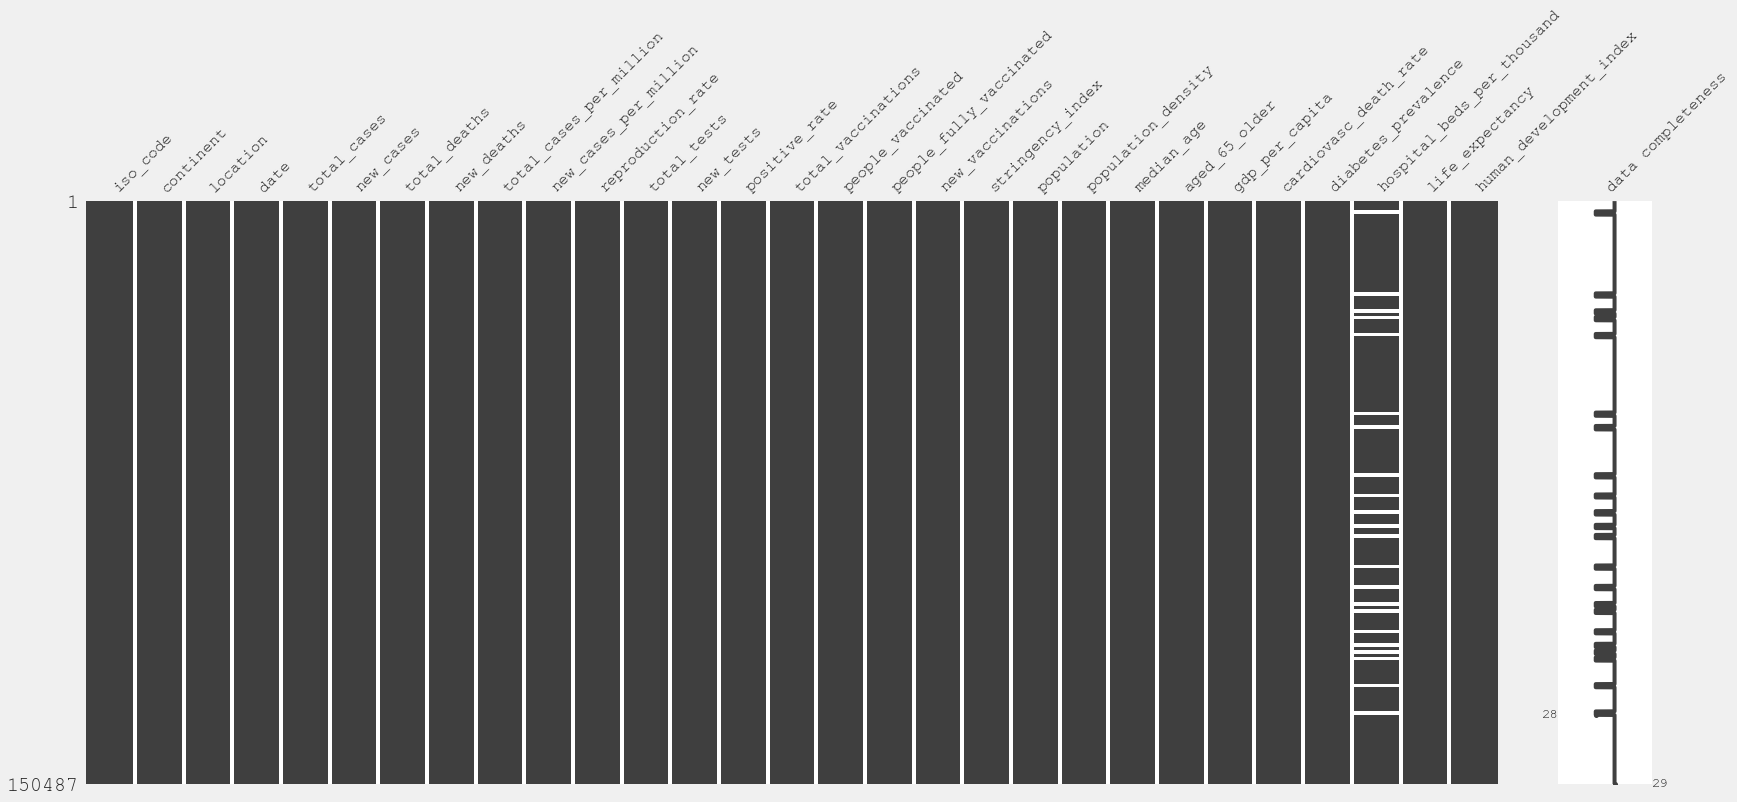

In [320]:
df12345 = df9.copy()
msno.matrix(df12345, labels=True)

Напишем функцию для группировки стран по количеству выявленных случаев, смертей, вакцинации и графической визуализации стран

In [241]:
def country_group_visual(df, col_name, text_figure, n_country, ascending):
    '''df - датафрейм, на основе которого будет проводиться группировка
       col_name - имя колонки для сортировки (total_cases, total_deaths)
       ascending (False по убыванию, True по возрастанию) '''
    # Сгруппируем данные
    group_country_df = df.groupby('location', as_index=False).agg({'new_cases': np.sum,
                                                                   'total_deaths' : np.max,
                                                'people_fully_vaccinated' : np.max,
                                            'gdp_per_capita' : np.mean,
                                            'median_age' : np.mean,
                                            'population_density': np.mean,
                                            'population' : np.mean})
    
    # Переименуем столбцы
    group_country_df.rename(columns = {'new_cases' : 'total_cases'}, inplace=True )
    # Сортировка
    top15_df = group_country_df.sort_values(by=col_name, ascending=ascending ).reset_index().head(n_country).copy()
    
    
    top15_df = top15_df.drop('index', axis=1)

# Соберем новый датафрейм для визуализации
    top15_country_death_df = top15_df[['location',
                                   'total_cases', 
                                   'total_deaths', 
                                   'population', 
                                   'people_fully_vaccinated']].copy()
    # создадим столбец процент инфицированных по населению
    top15_country_death_df['covid_infeceted_percentage'] = np.round((100 * top15_country_death_df['total_cases'] 
                                                                     / 
                                                                     top15_country_death_df['population']), 2)
    # Создаем процент вакцинированных
    top15_country_death_df['vaccin_of_population_percentage'] =  (np.round(100 
                                                                           * top15_country_death_df['people_fully_vaccinated']
                                                                / 
                                                                top15_country_death_df['population']))
    # Создаем процент смертности
    top15_country_death_df['deaths_percentage_popultion'] =  round((100 * top15_country_death_df['total_deaths']
                                                                / 
                                                                top15_country_death_df['population']), 3)

    fig = plt.figure(figsize=(16, 10))

# Создаем цвета
    colors = get_colors(3)
    # Переменные
    gr_col = ['covid_infeceted_percentage', 'vaccin_of_population_percentage', 'deaths_percentage_popultion']
    # Названия графиков
    gr_name = ['% Заболевших COVID', '%, Вакцинации', '%, Смерти населения']

    for i, name in enumerate(gr_col):
        ax = fig.add_subplot(1, 4, i+1)
        ax.barh(top15_country_death_df['location'], top15_country_death_df[name], color=colors[i])
    # Устанавливаем названия
        ax.set_title(' '.join(gr_name[i].split('_'))+'\n', fontsize=15, color='black', weight='bold')
        plt.yticks(fontsize=15, weight='bold')

    # Выводим значения
        for idx, value in top15_country_death_df[gr_col[i]].iteritems():
            ax.text(value, idx, str(value)+'%', va='center', fontsize=15, weight='bold')
        if i>0:
            ax.tick_params(labelleft = False)
    plt.suptitle(text_figure, fontsize=20, y=1, x=0.43, color='blue', weight='bold')    
    fig.tight_layout()
    plt.rcParams['font.family'] = "Courier New, monospace"
    return plt.show()


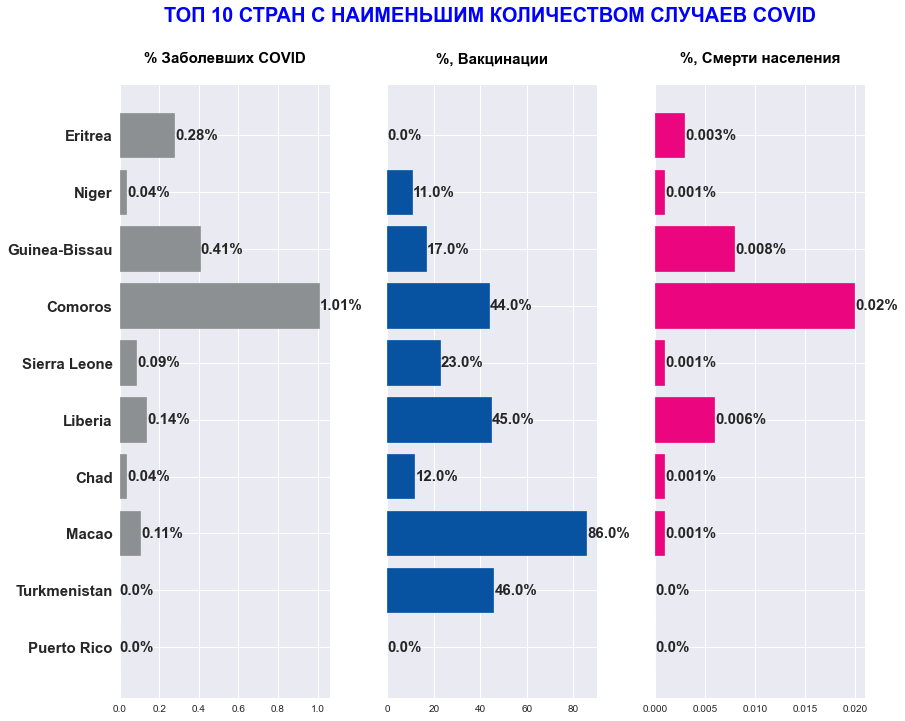

In [242]:
df = df9
col_name='total_cases'
text_figure='ТОП 10 СТРАН С НАИМЕНЬШИМ КОЛИЧЕСТВОМ СЛУЧАЕВ COVID'
n_country=10
ascending=True
country_group_visual(df, col_name, text_figure, n_country, ascending)

### ТОП 10 стран с наименьшим количеством смертей

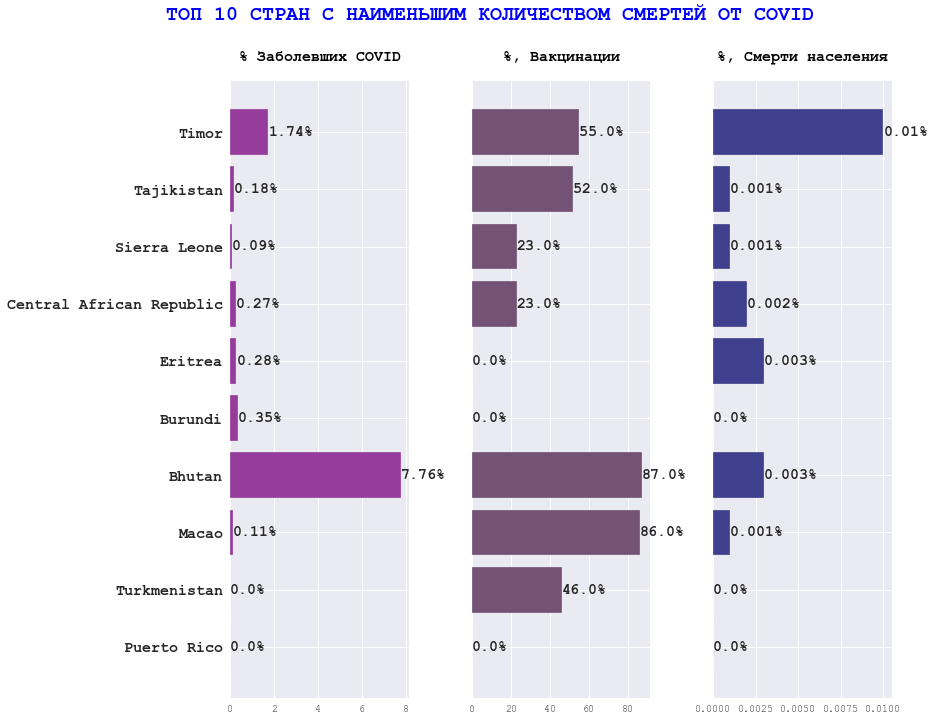

In [243]:
df = df9
col_name='total_deaths'
text_figure='ТОП 10 СТРАН С НАИМЕНЬШИМ КОЛИЧЕСТВОМ СМЕРТЕЙ ОТ COVID'
n_country=10
ascending=True
country_group_visual(df, col_name, text_figure, n_country, ascending)

### ТОП 10 стран с наибольшим  количеством случаев COVID

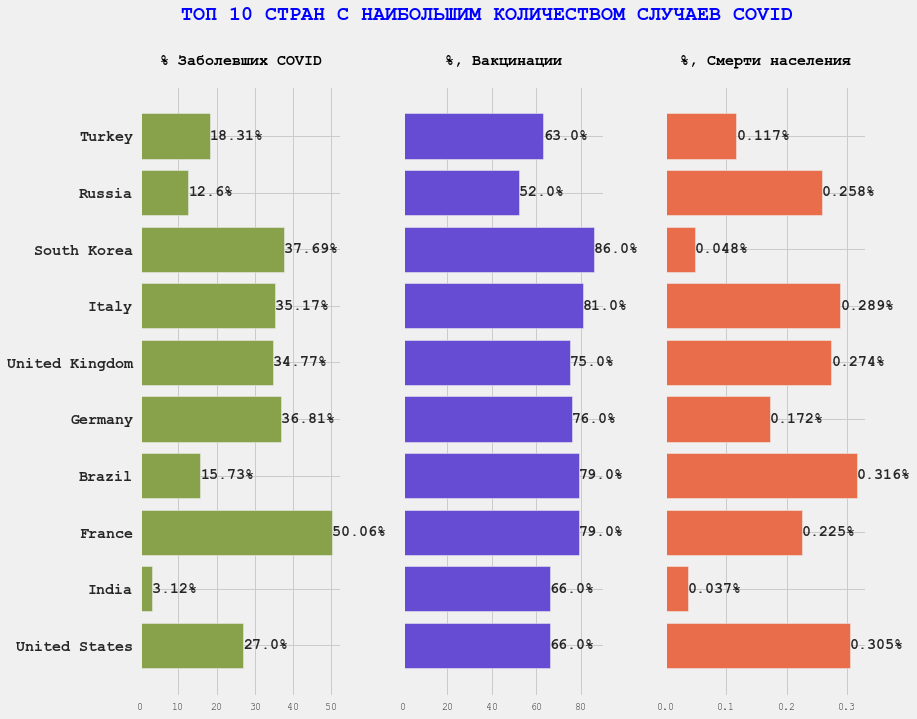

In [291]:
df = df9
col_name='total_cases'
text_figure='ТОП 10 СТРАН С НАИБОЛЬШИМ КОЛИЧЕСТВОМ СЛУЧАЕВ COVID'
n_country=10
ascending=False
country_group_visual(df, col_name, text_figure, n_country, ascending)

### ТОП 10 стран с наибольшим  количеством смертей от COVID

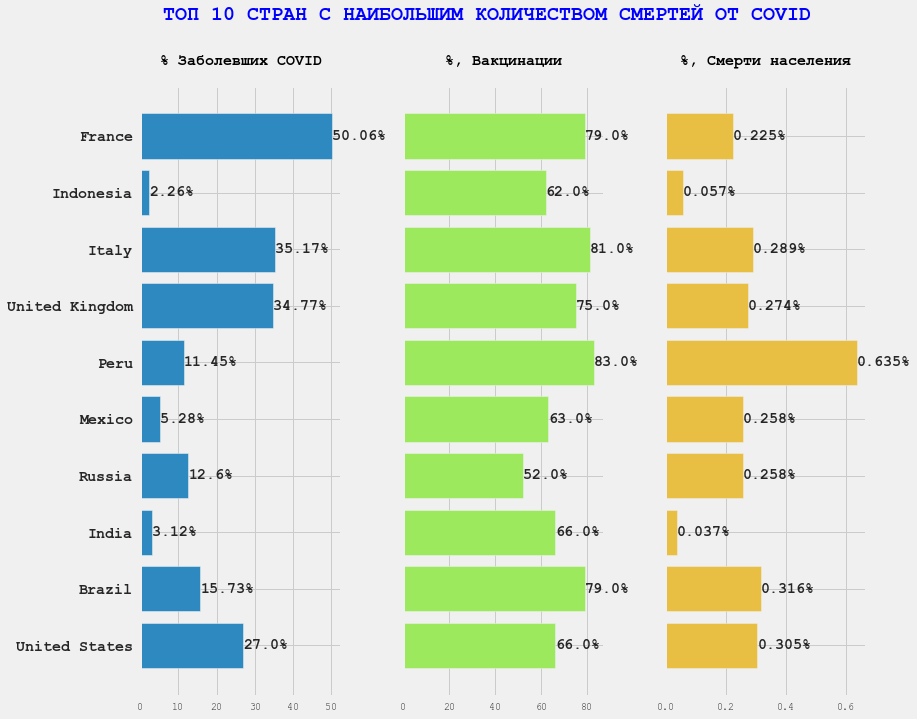

In [292]:
df = df9
col_name='total_deaths'
text_figure='ТОП 10 СТРАН С НАИБОЛЬШИМ КОЛИЧЕСТВОМ СМЕРТЕЙ ОТ COVID'
n_country=10
ascending=False
country_group_visual(df, col_name, text_figure, n_country, ascending)

### Сгруппируем Датафрейм по локации

In [323]:
df10 = df9.groupby('location', as_index=False).agg({'new_cases': np.mean,
                                                                'total_cases': np.max,
                                                                'new_vaccinations' : np.sum,
                                                'people_fully_vaccinated' : np.max,
                                             'total_deaths' : np.max,
                                            'gdp_per_capita' : np.mean,
                                            'median_age' : np.mean,
                                            'aged_65_older' : np.mean,
                                            'population_density': np.mean,
                                            'population' : np.mean,
                                            'cardiovasc_death_rate' : np.mean,
                                            'diabetes_prevalence' : np.mean,
                                            'stringency_index' : 'mean',
                                             'human_development_index' : np.mean,
                                             'life_expectancy' : np.mean}).copy()

df10 = df10[df10['total_cases'] > 0]

# Случаев на миллион
df10['cases_per_population'] = 100 * df10['total_cases'] / df10['population']
# Смертей на миллион
df10['deaths_per_population'] = 100 * df10['total_deaths'] / df10['population']
# Доля вакцинированног онаселения
df10['vacin_per_population'] = 100 * df10['people_fully_vaccinated'] / df10['population']
# Создадим столбец 'death_rate' показывает долю смертей от общих случаев КОВИД
df10['death_rate'] = 100 * df10['total_deaths'] / df10['total_cases']

<AxesSubplot:>

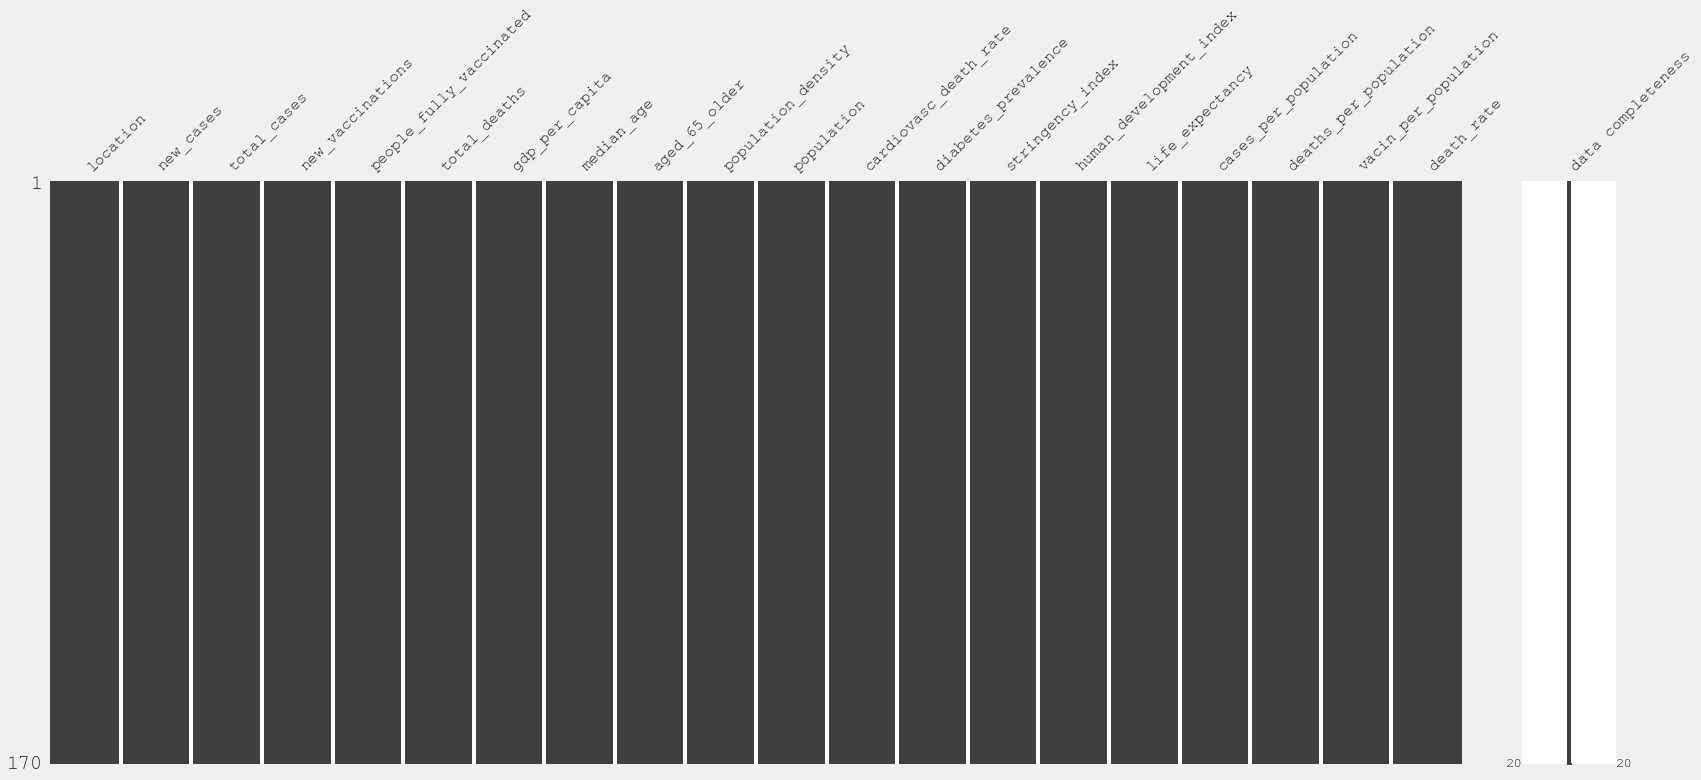

In [324]:
msno.matrix(df10, labels=True)

#### Сделаем из группированных данных отдельные группированные данные

Топ 10 стран с наибольшим показателем `diabetes_prevalence`

In [286]:
df_top_10_diabet = (df10.sort_values(by='diabetes_prevalence', 
                                     ascending=False)[['location', 'diabetes_prevalence', 
                                                       'cases_per_population', 'death_rate']].head(10))
df_top_10_diabet

,location,diabetes_prevalence,cases_per_population,death_rate
99,Mauritius,22.02,18.566650,0.418386
138,Solomon Islands,18.68,3.043578,0.710175
131,Saudi Arabia,17.72,2.249605,1.142886
120,Papua New Guinea,17.65,0.450036,1.478471
44,Egypt,17.31,0.471934,4.802723
162,United Arab Emirates,17.26,10.536378,0.236535
94,Malaysia,16.74,13.892388,0.770591
127,Qatar,16.52,15.077253,0.167772
9,Bahrain,16.52,44.945311,0.229447
81,Kuwait,15.84,15.381470,0.391446


Топ 10 стран с наименьшим показателем `diabetes_prevalence`

In [287]:
df_bot_10_diabet = (df10.sort_values(by='diabetes_prevalence')[['location', 
                                                                'diabetes_prevalence', 
                                                                'cases_per_population', 
                                                                'death_rate']].head(10))
df_bot_10_diabet

,location,diabetes_prevalence,cases_per_population,death_rate
13,Benin,0.99,0.209827,0.597705
172,Zimbabwe,1.82,1.602617,2.174668
55,Gambia,1.91,0.457515,3.046862
134,Sierra Leone,2.42,0.091810,1.616867
62,Guinea-Bissau,2.42,0.408207,2.044698
96,Mali,2.42,0.142511,2.360893
87,Liberia,2.42,0.144568,3.915823
25,Cape Verde,2.42,10.564953,0.660077
112,Niger,2.42,0.036052,3.416081
98,Mauritania,2.42,1.353355,1.586692


Топ 10 стран с наибольшим показателем `gdp_per_capita`

In [249]:
df_top_10_gdp = (df10.sort_values(by='gdp_per_capita', 
                                     ascending=False)[['location', 'gdp_per_capita',
                                                      'cases_per_population', 'death_rate']].head(10))
df_top_10_gdp

,location,gdp_per_capita,cases_per_population,death_rate
127,Qatar,116935.600,15.077253,0.167772
91,Macao,104861.851,0.114767,0.761421
90,Luxembourg,94277.965,43.995270,0.393926
135,Singapore,85535.383,30.913323,0.088381
72,Ireland,67335.293,32.972173,0.466802
162,United Arab Emirates,67293.483,10.536378,0.236535
81,Kuwait,65530.537,15.381470,0.391446
115,Norway,64800.057,26.932377,0.248976
148,Switzerland,57410.166,45.438667,0.351737
66,Hong Kong,56054.920,17.811637,0.710761


Топ 10 стран с наименьшим показателем `gdp_per_capita`

In [250]:
df_bot_10_gdp = (df10.sort_values(by='gdp_per_capita')[['location', 'gdp_per_capita',
                                                      'cases_per_population', 'death_rate']].head(10))
df_bot_10_gdp

,location,gdp_per_capita,cases_per_population,death_rate
139,Somalia,309.000,0.157961,5.048781
26,Central African Republic,661.240,0.269591,0.768080
21,Burundi,702.225,0.354045,0.085514
87,Liberia,752.788,0.144568,3.915823
39,Democratic Republic of Congo,808.133,0.096120,1.508034
112,Niger,926.000,0.036052,3.416081
93,Malawi,1095.042,0.439035,3.049597
105,Mozambique,1136.103,0.715287,0.965381
134,Sierra Leone,1390.300,0.091810,1.616867
31,Comoros,1413.890,1.010314,1.939525


Топ 10 стран с наибольшим показателем `aged_65_older`

In [251]:
df_top_10_aged_65 = (df10.sort_values(by='aged_65_older', 
                                     ascending=False)[['location', 'aged_65_older',
                                                      'cases_per_population', 'death_rate']].head(10))
df_top_10_aged_65

,location,aged_65_older,cases_per_population,death_rate
76,Japan,27.049,9.553598,0.270391
74,Italy,23.021,35.174066,0.822753
125,Portugal,21.502,51.832873,0.460772
57,Germany,21.453,36.809787,0.468046
52,Finland,21.228,21.153101,0.427998
19,Bulgaria,20.801,17.463216,3.106544
59,Greece,20.396,41.639742,0.712715
147,Sweden,19.985,24.208986,0.759636
84,Latvia,19.754,45.825246,0.685549
35,Croatia,19.724,29.084181,1.377389


Топ 10 стран с наименьшим показателем `aged_65_older`

In [252]:
df_bot_10_aged_65 = (df10.sort_values(by='aged_65_older')[['location', 'aged_65_older',
                                                      'cases_per_population', 'death_rate']].head(10))
df_bot_10_aged_65

,location,aged_65_older,cases_per_population,death_rate
162,United Arab Emirates,1.144,10.536378,0.236535
127,Qatar,1.307,15.077253,0.167772
160,Uganda,2.168,0.368916,2.144690
55,Gambia,2.339,0.457515,3.046862
81,Kuwait,2.345,15.381470,0.391446
116,Oman,2.355,8.754331,1.169464
9,Bahrain,2.372,44.945311,0.229447
3,Angola,2.405,0.296492,1.868994
20,Burkina Faso,2.409,0.095599,1.831693
171,Zambia,2.480,1.691988,1.218576


Топ 10 стран с наибольшим показателем `cardiovasc_death_rate`

In [253]:
df_top_10_cvd = (df10.sort_values(by='cardiovasc_death_rate', 
                                     ascending=False)[['location', 'cardiovasc_death_rate',
                                                      'cases_per_population', 'death_rate']].head(10))
df_top_10_cvd

,location,cardiovasc_death_rate,cases_per_population,death_rate
166,Uzbekistan,724.417,0.712643,0.673998
0,Afghanistan,597.029,0.462031,4.179261
120,Papua New Guinea,561.494,0.450036,1.478471
8,Azerbaijan,559.812,7.730841,1.221778
161,Ukraine,539.849,12.156782,2.200445
159,Turkmenistan,536.783,0.000000,NaN
44,Egypt,525.432,0.471934,4.802723
56,Georgia,496.218,44.870329,0.999811
170,Yemen,495.003,0.035926,18.136552
78,Kazakhstan,466.792,7.436452,1.332506


Топ 10 стран с наименьшим показателем `cardiovasc_death_rate`

In [254]:
df_bot_10_cvd = (df10.sort_values(by='cardiovasc_death_rate')[['location', 'cardiovasc_death_rate',
                                                      'cases_per_population', 'death_rate']].head(10))
df_bot_10_cvd

,location,cardiovasc_death_rate,cases_per_population,death_rate
66,Hong Kong,50.000,17.811637,0.710761
76,Japan,79.370,9.553598,0.270391
91,Macao,85.000,0.114767,0.761421
122,Peru,85.755,11.446611,5.547979
141,South Korea,85.998,37.690893,0.127754
53,France,86.060,50.059651,0.449913
135,Singapore,92.243,30.913323,0.088381
73,Israel,93.320,49.164611,0.248408
143,Spain,99.403,27.807360,0.836010
148,Switzerland,99.739,45.438667,0.351737


In [131]:
# График сравнение случаев на миллион КОВИД от gdp_per_capita, diabetes_prevalence
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Top 10 gdp_per_capita", "Top 10 diabetes_prevalence", "cases_per_population и gdp_per_capita",
                   "cases_per_population и diabetes_prevalence")
)

fig.add_trace(go.Bar(name='gdp_per_capita',text='gdp_per_capita', x=df_top_10_gdp['location'], 
                     y=df_top_10_gdp['gdp_per_capita']),
              row=1, col=1)

fig.add_trace(go.Bar(name='gdp_per_capita',text='gdp_per_capita', x=df_bot_10_gdp['location'], 
                     y=df_bot_10_gdp['gdp_per_capita']),
              row=1, col=1)

fig.add_trace(go.Bar(name='diabetes_prevalence',text='diabetes_prevalence', x=df_top_10_diabet['location'], 
                     y=df_top_10_diabet['diabetes_prevalence']),
              row=1, col=2)

fig.add_trace(go.Bar(name='diabetes_prevalence', text='diabetes_prevalence',x=df_bot_10_diabet['location'], 
                     y=df_bot_10_diabet['diabetes_prevalence']),
              row=1, col=2)




fig.add_trace(go.Bar(name='gdp_per_capita',text='female_smokers', x=df_top_10_gdp['location'], 
                     y=df_top_10_gdp['cases_per_population']),
              row=2, col=1)

fig.add_trace(go.Bar(name='gdp_per_capita',text='female_smokers', x=df_bot_10_gdp['location'], 
                     y=df_bot_10_gdp['cases_per_population']),
              row=2, col=1)

fig.add_trace(go.Bar(name='diabetes_prevalence',text='male_smokers', x=df_top_10_diabet['location'], 
                     y=df_top_10_diabet['cases_per_population']),
              row=2, col=2)

fig.add_trace(go.Bar(name='diabetes_prevalence', text='male_smokers',x=df_bot_10_diabet['location'], 
                     y=df_bot_10_diabet['cases_per_population']),
              row=2, col=2)


fig.update_layout(height=1200,title_text="Сравнение доли в % случаев COVID населения и  diabetes_prevalence, gdp_per_capita ", 
                  showlegend=False, margin =dict(l=0, r=0, t=100, b=100))

#fig.show()
iplot(fig)

In [132]:
# График сравнение случаев на миллион КОВИД от cardiovasc_death_rate, aged_65_older
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("cardiovasc_death_rate", "Top 10 aged_65_older", "cases_per_population и cardiovasc_death_rate",
                   "cases_per_population и diabetes_prevalence")
)

fig.add_trace(go.Bar(name='cardiovasc_death_rate',text='cardiovasc_death_rate', x=df_top_10_cvd['location'], 
                     y=df_top_10_cvd['cardiovasc_death_rate']),
              row=1, col=1)

fig.add_trace(go.Bar(name='cardiovasc_death_rate',text='gdp_per_capita', x=df_bot_10_cvd['location'], 
                     y=df_bot_10_cvd['cardiovasc_death_rate']),
              row=1, col=1)

fig.add_trace(go.Bar(name='aged_65_older',text='aged_65_older', x=df_top_10_aged_65['location'], 
                     y=df_top_10_aged_65['aged_65_older']),
              row=1, col=2)

fig.add_trace(go.Bar(name='aged_65_older', text='aged_65_older',x=df_bot_10_aged_65['location'], 
                     y=df_bot_10_aged_65['aged_65_older']),
              row=1, col=2)




fig.add_trace(go.Bar(name='cardiovasc_death_rate',text='cardiovasc_death_rate', x=df_top_10_cvd['location'], 
                     y=df_top_10_cvd['cases_per_population']),
              row=2, col=1)

fig.add_trace(go.Bar(name='cardiovasc_death_rate',text='cardiovasc_death_rate', x=df_bot_10_cvd['location'], 
                     y=df_bot_10_cvd['cases_per_population']),
              row=2, col=1)

fig.add_trace(go.Bar(name='aged_65_older',text='aged_65_older', x=df_top_10_aged_65['location'], 
                     y=df_top_10_aged_65['cases_per_population']),
              row=2, col=2)

fig.add_trace(go.Bar(name='aged_65_older', text='aged_65_older',x=df_bot_10_diabet['location'], 
                     y=df_bot_10_aged_65['cases_per_population']),
              row=2, col=2)


fig.update_layout(height=1200,title_text="Сравнение доли в % случаев COVID населения и  cardiovasc_death_rate, aged_65_older ", 
                  showlegend=False, margin =dict(l=0, r=0, t=100, b=100))

#fig.show()
iplot(fig)

### Сделаем датафрейм с кореляционной матрицей, чтобы понять возможные связи (Кореляция Пирсона)

In [255]:
df10_corr_pearson = df10.corr()
df10_corr_pearson

,new_cases,total_cases,new_vaccinations,people_fully_vaccinated,total_deaths,gdp_per_capita,median_age,aged_65_older,population_density,population,cardiovasc_death_rate,diabetes_prevalence,stringency_index,human_development_index,life_expectancy,cases_per_population,deaths_per_population,vacin_per_population,death_rate
new_cases,1.000000,0.999904,0.341952,0.356312,0.896685,0.225957,0.291288,0.306124,-0.030701,0.397334,-0.222226,0.040037,0.054333,0.303203,0.263710,0.254996,0.230453,0.267654,-0.095690
total_cases,0.999904,1.000000,0.341299,0.355604,0.894715,0.225947,0.289610,0.304926,-0.030194,0.396625,-0.221688,0.039865,0.054037,0.301534,0.262020,0.253253,0.227601,0.266026,-0.095509
new_vaccinations,0.341952,0.341299,1.000000,0.994842,0.346905,-0.003400,0.102205,0.049858,-0.015182,0.961814,-0.032343,0.078975,-0.082267,0.056002,0.078362,-0.067472,-0.046792,0.192931,-0.048979
people_fully_vaccinated,0.356312,0.355604,0.994842,1.000000,0.364714,-0.013421,0.087822,0.036935,-0.014406,0.981648,-0.023494,0.080633,-0.076612,0.042017,0.064186,-0.075554,-0.052589,0.182486,-0.044406
total_deaths,0.896685,0.894715,0.346905,0.364714,1.000000,0.114455,0.184459,0.173246,-0.042029,0.414931,-0.125409,0.070715,0.035514,0.206779,0.162206,0.099519,0.303522,0.197695,0.041270
gdp_per_capita,0.225957,0.225947,-0.003400,-0.013421,0.114455,1.000000,0.642676,0.506348,0.429051,-0.048625,-0.485499,0.239660,0.073776,0.760664,0.678234,0.562599,0.201137,0.609346,-0.331140
median_age,0.291288,0.289610,0.102205,0.087822,0.184459,0.642676,1.000000,0.914929,0.151468,0.031538,-0.343691,0.165056,0.118071,0.904232,0.853679,0.735235,0.617488,0.673433,-0.295366
aged_65_older,0.306124,0.304926,0.049858,0.036935,0.173246,0.506348,0.914929,1.000000,0.062540,-0.005666,-0.347272,-0.044917,0.109970,0.788695,0.735006,0.740045,0.620189,0.511979,-0.245349
population_density,-0.030701,-0.030194,-0.015182,-0.014406,-0.042029,0.429051,0.151468,0.062540,1.000000,-0.021744,-0.201905,0.127739,-0.132768,0.187858,0.205471,0.005856,-0.086344,0.189635,-0.089005
population,0.397334,0.396625,0.961814,0.981648,0.414931,-0.048625,0.031538,-0.005666,-0.021744,1.000000,0.000392,0.068051,-0.078675,-0.009678,0.005227,-0.113959,-0.079348,0.124816,-0.009792


### Посмотрим какие факторы наиболее сильно влияют на `new_cases` 

In [256]:
df10_corr_pearson['new_cases'].sort_values(ascending=False)

new_cases                  1.000000
total_cases                0.999904
total_deaths               0.896685
population                 0.397334
people_fully_vaccinated    0.356312
new_vaccinations           0.341952
aged_65_older              0.306124
human_development_index    0.303203
median_age                 0.291288
vacin_per_population       0.267654
life_expectancy            0.263710
cases_per_population       0.254996
deaths_per_population      0.230453
gdp_per_capita             0.225957
stringency_index           0.054333
diabetes_prevalence        0.040037
population_density        -0.030701
death_rate                -0.095690
cardiovasc_death_rate     -0.222226
Name: new_cases, dtype: float64

In [257]:
# Отберем наиболее сильные признаки
df10_corr_pearson['new_cases'].sort_values(ascending=False).index.tolist()


['new_cases',
 'total_cases',
 'total_deaths',
 'population',
 'people_fully_vaccinated',
 'new_vaccinations',
 'aged_65_older',
 'human_development_index',
 'median_age',
 'vacin_per_population',
 'life_expectancy',
 'cases_per_population',
 'deaths_per_population',
 'gdp_per_capita',
 'stringency_index',
 'diabetes_prevalence',
 'population_density',
 'death_rate',
 'cardiovasc_death_rate']

In [258]:
list_feature = ['new_cases', 'total_deaths', 'population',
                 'people_fully_vaccinated','aged_65_older', 
                'human_development_index',
                'median_age', 'vacin_per_population']

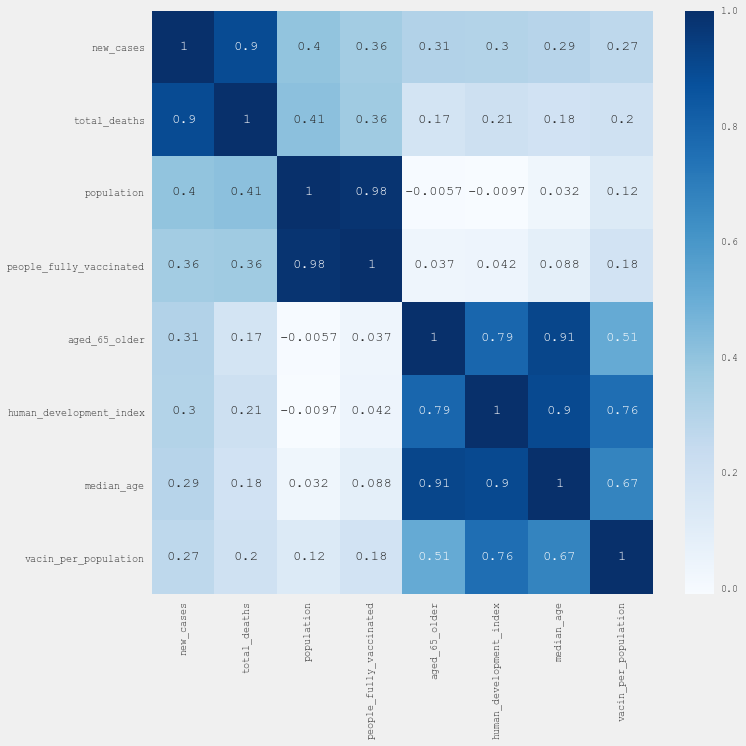

In [260]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10, 10))
sns.heatmap(df10[list_feature].corr(),annot=True,cmap='Blues');

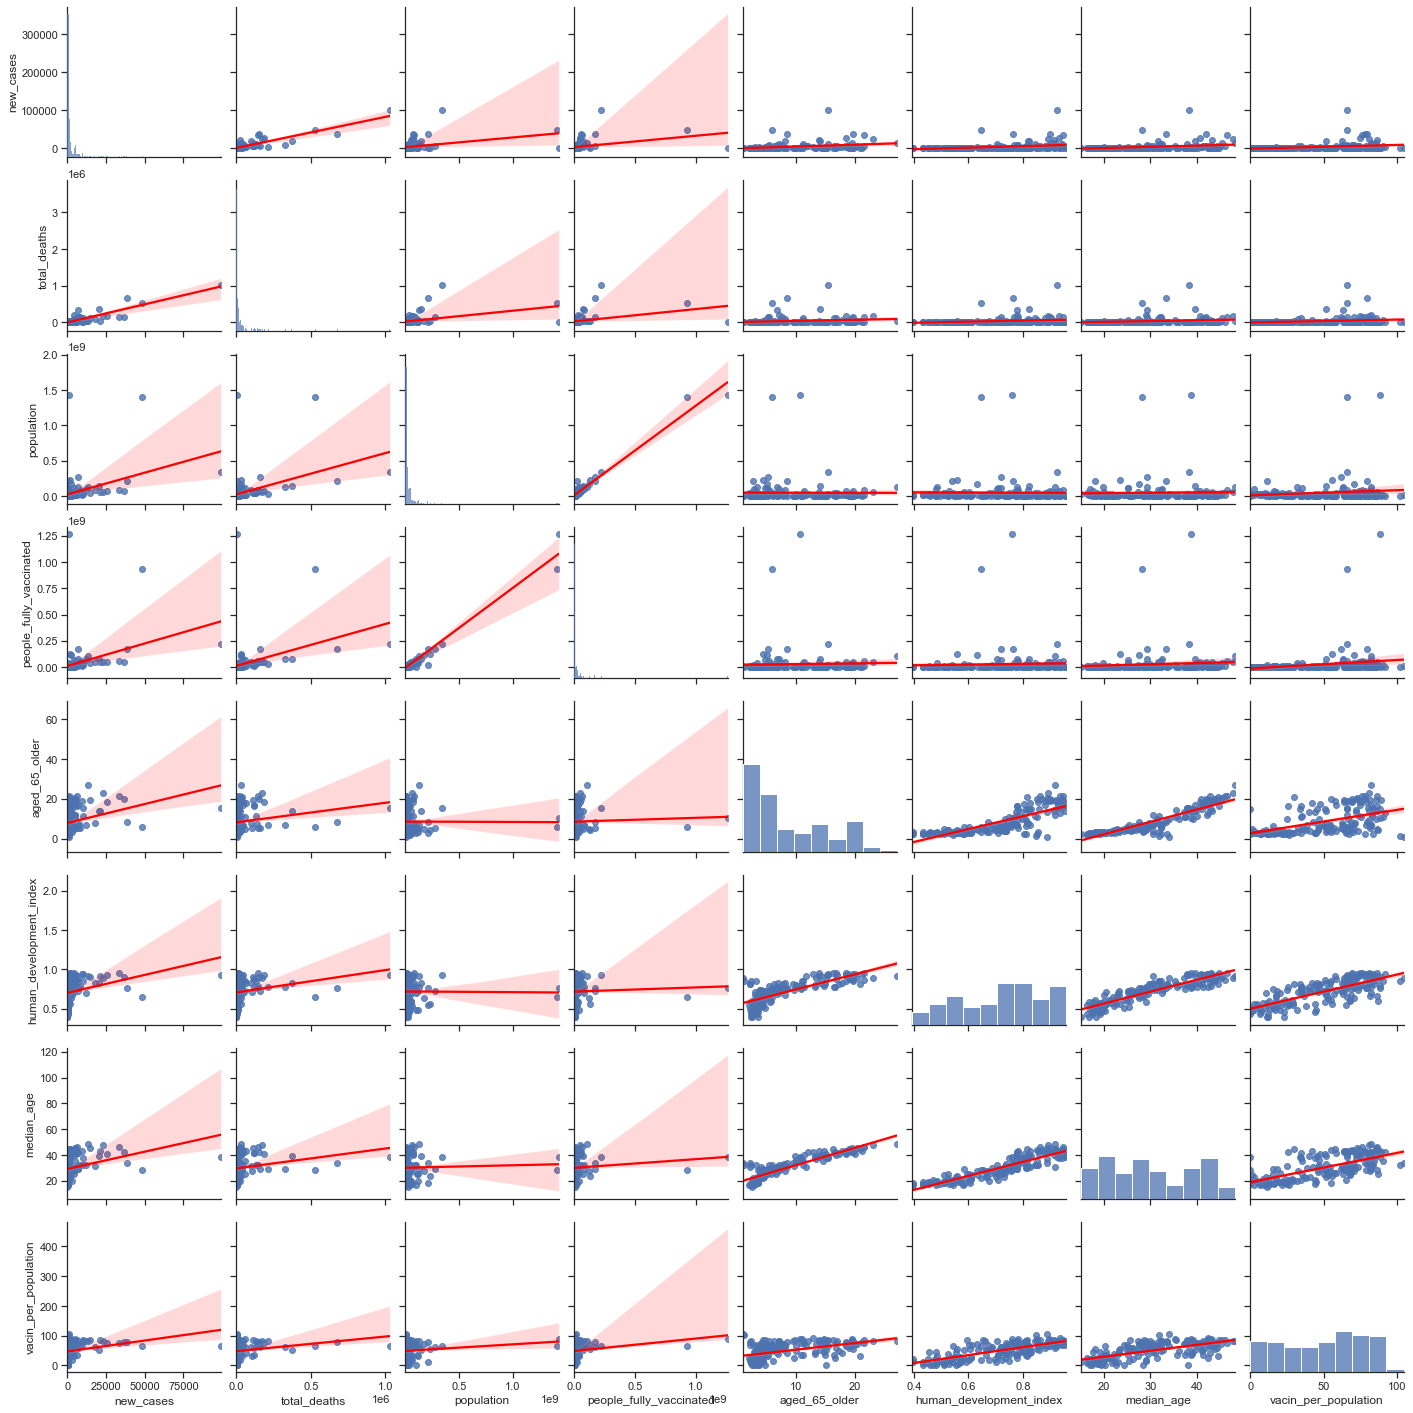

In [136]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df10[list_feature], kind='reg', plot_kws={'line_kws':{'color':'red'}});

In [261]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [262]:
phik_overview = df10.phik_matrix()
phik_overview[phik_overview>0.3]

interval columns not set, guessing: ['new_cases', 'total_cases', 'new_vaccinations', 'people_fully_vaccinated', 'total_deaths', 'gdp_per_capita', 'median_age', 'aged_65_older', 'population_density', 'population', 'cardiovasc_death_rate', 'diabetes_prevalence', 'stringency_index', 'human_development_index', 'life_expectancy', 'cases_per_population', 'deaths_per_population', 'vacin_per_population', 'death_rate']


,location,new_cases,total_cases,new_vaccinations,people_fully_vaccinated,total_deaths,gdp_per_capita,median_age,aged_65_older,population_density,population,cardiovasc_death_rate,diabetes_prevalence,stringency_index,human_development_index,life_expectancy,cases_per_population,deaths_per_population,vacin_per_population,death_rate
location,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
new_cases,1.0,1.000000,1.000000,0.824888,0.802373,0.858599,0.378747,0.337092,0.518827,NaN,0.851127,NaN,NaN,NaN,NaN,NaN,0.411625,NaN,NaN,NaN
total_cases,1.0,1.000000,1.000000,0.824888,0.802373,0.858599,0.378747,0.337092,0.518827,NaN,0.851127,NaN,NaN,NaN,NaN,NaN,0.411625,NaN,NaN,NaN
new_vaccinations,1.0,0.824888,0.824888,1.000000,0.998973,0.828507,NaN,NaN,NaN,NaN,0.954019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_fully_vaccinated,1.0,0.802373,0.802373,0.998973,1.000000,0.799719,NaN,NaN,NaN,NaN,0.959232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,1.0,0.858599,0.858599,0.828507,0.799719,1.000000,NaN,NaN,NaN,NaN,0.836463,NaN,NaN,NaN,NaN,NaN,NaN,0.688425,NaN,0.464455
gdp_per_capita,1.0,0.378747,0.378747,NaN,NaN,NaN,1.000000,0.568371,0.564909,0.945100,NaN,NaN,0.301365,NaN,0.666098,0.543895,0.577253,NaN,0.640185,NaN
median_age,1.0,0.337092,0.337092,NaN,NaN,NaN,0.568371,1.000000,0.905953,NaN,NaN,0.455656,0.581115,NaN,0.848192,0.805279,0.718641,0.517049,0.664859,NaN
aged_65_older,1.0,0.518827,0.518827,NaN,NaN,NaN,0.564909,0.905953,1.000000,NaN,NaN,0.413629,0.446127,0.341078,0.795358,0.730772,0.745165,0.658261,0.591957,NaN
population_density,1.0,NaN,NaN,NaN,NaN,NaN,0.945100,NaN,NaN,1.000000,NaN,NaN,NaN,0.302618,NaN,NaN,NaN,NaN,0.327483,NaN


In [140]:
phik_overview[phik_overview>0.3]

,location,new_cases,total_cases,new_vaccinations,people_fully_vaccinated,total_deaths,gdp_per_capita,median_age,aged_65_older,population_density,population,cardiovasc_death_rate,diabetes_prevalence,stringency_index,human_development_index,life_expectancy,cases_per_population,deaths_per_population,vacin_per_population,death_rate
location,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
new_cases,1.0,1.000000,1.000000,0.824888,0.802373,0.858599,0.378747,0.337092,0.518827,NaN,0.851127,NaN,NaN,NaN,NaN,NaN,0.411625,NaN,NaN,NaN
total_cases,1.0,1.000000,1.000000,0.824888,0.802373,0.858599,0.378747,0.337092,0.518827,NaN,0.851127,NaN,NaN,NaN,NaN,NaN,0.411625,NaN,NaN,NaN
new_vaccinations,1.0,0.824888,0.824888,1.000000,0.998973,0.828507,NaN,NaN,NaN,NaN,0.954019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
people_fully_vaccinated,1.0,0.802373,0.802373,0.998973,1.000000,0.799719,NaN,NaN,NaN,NaN,0.959232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_deaths,1.0,0.858599,0.858599,0.828507,0.799719,1.000000,NaN,NaN,NaN,NaN,0.836463,NaN,NaN,NaN,NaN,NaN,NaN,0.688425,NaN,0.464455
gdp_per_capita,1.0,0.378747,0.378747,NaN,NaN,NaN,1.000000,0.568371,0.564909,0.945100,NaN,NaN,0.301365,NaN,0.666098,0.543895,0.577253,NaN,0.640185,NaN
median_age,1.0,0.337092,0.337092,NaN,NaN,NaN,0.568371,1.000000,0.905953,NaN,NaN,0.455656,0.581115,NaN,0.848192,0.805279,0.718641,0.517049,0.664859,NaN
aged_65_older,1.0,0.518827,0.518827,NaN,NaN,NaN,0.564909,0.905953,1.000000,NaN,NaN,0.413629,0.446127,0.341078,0.795358,0.730772,0.745165,0.658261,0.591957,NaN
population_density,1.0,NaN,NaN,NaN,NaN,NaN,0.945100,NaN,NaN,1.000000,NaN,NaN,NaN,0.302618,NaN,NaN,NaN,NaN,0.327483,NaN


### Построим графики доли вакцинированного населения и количества новых случаев по времени

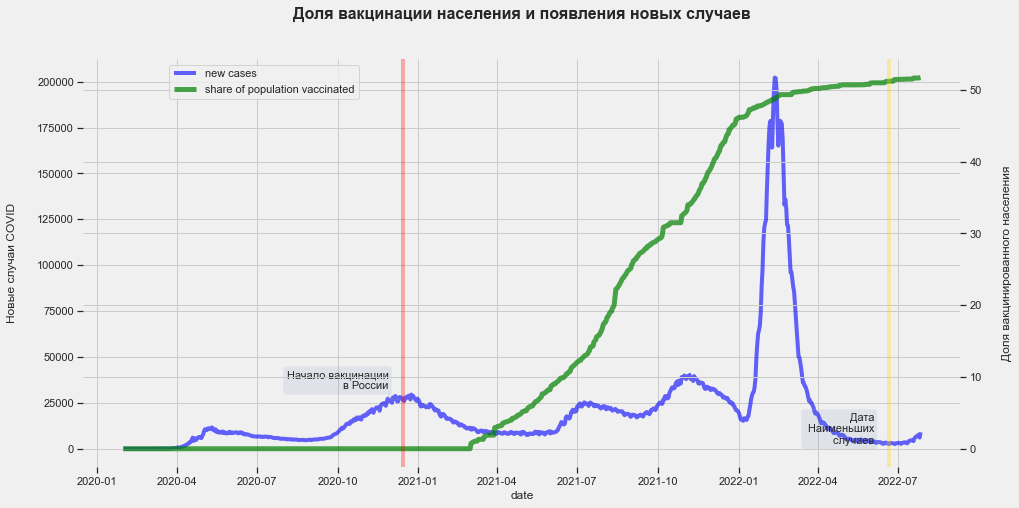

In [195]:
plt.style.use('fivethirtyeight')
sns.set_context('notebook')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(df_russia['date'], df_russia['new_cases'], 'blue', label = 'new cases', linewidth = 4, alpha= 0.6)

ax2 = ax.twinx()
ax2.plot(df_russia.date, 100 * (df_russia['people_fully_vaccinated'] / df_russia['population']) , 'green', label = 'share of population vaccinated',linewidth = 5, alpha= 0.7)

ax.set_xlabel('date')
ax.set_ylabel(r'Новые случаи COVID', labelpad=20)
ax2.set_ylabel(r'Доля вакцинированного населения', labelpad=20)


plt.axvline(datetime(2020,12,15), linewidth = 4, color='red',alpha= 0.3);
plt.axvline(min_new_cases_date, linewidth = 4, color='gold',alpha= 0.3);

ax.annotate('Дата\n Наименьших\n случаев', xy=(min_new_cases_date, min_new_cases['new_cases']),  xycoords='data',
             xytext=(-15, 15), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1));

ax.annotate('Начало вакцинации\n в России', xy=(datetime(2020,12,15), 26265),  xycoords='data',
             xytext=(-15, 20), textcoords='offset points',
             size=11, ha='right', va='center',
             bbox=dict(boxstyle='round', alpha=0.1),
             arrowprops=dict(arrowstyle='wedge,tail_width=0.5', alpha=0.1))

ax.axes.set_title('Доля вакцинации населения и появления новых случаев',fontsize=16, weight='bold', pad=40)


sns.despine(left=True, bottom=True)

fig.legend(loc=1, bbox_to_anchor=(0.32,1), bbox_transform=ax.transAxes);

Text(0, 0.5, 'Доля вакцинированного населения')

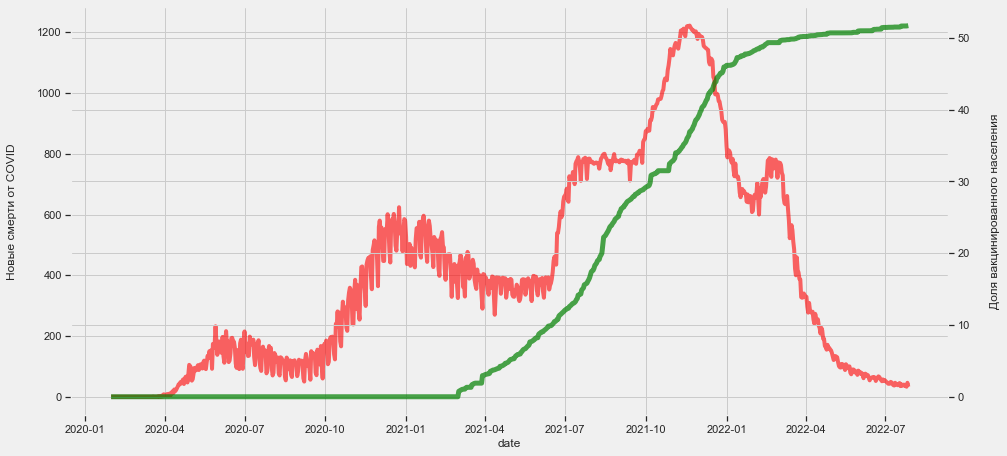

In [196]:
plt.style.use('fivethirtyeight')
sns.set_context('notebook')

fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)
ax.plot(df_russia['date'], df_russia['new_deaths'], 'red', label = 'new cases', linewidth = 4, alpha= 0.6)

ax2 = ax.twinx()
ax2.plot(df_russia.date, 100 * (df_russia['people_fully_vaccinated'] / df_russia['population']) , 'green', label = 'share of population vaccinated',linewidth = 5, alpha= 0.7)

ax.set_xlabel('date')
ax.set_ylabel(r'Новые смерти от COVID', labelpad=20)
ax2.set_ylabel(r'Доля вакцинированного населения', labelpad=20)